# ETAPE 1: ANALYSE EXPLORATOIRE DES FICHIERS 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
sirh = pd.read_csv('extrait_sirh.csv')
sondage = pd.read_csv('extrait_sondage.csv')
eval = pd.read_csv('extrait_eval.csv')

## I- Le fichier Sirh

In [3]:
# Affichage des 5 premi√®res lignes de chaque DataFrame  
print(sirh.shape)
sirh.head()

(1470, 12)


id_employee  age genre  revenu_mensuel statut_marital departement  \
0            1   41     F            5993    C√©libataire  Commercial   
1            2   49     M            5130       Mari√©(e)  Consulting   
2            4   37     M            2090    C√©libataire  Consulting   
3            5   33     F            2909       Mari√©(e)  Consulting   
4            7   27     M            3468       Mari√©(e)  Consulting   

                    poste  nombre_experiences_precedentes  \
0        Cadre Commercial                               8   
1  Assistant de Direction                               1   
2              Consultant                               6   
3  Assistant de Direction                               1   
4              Consultant                               9   

   nombre_heures_travailless  annee_experience_totale  \
0                         80                        8   
1                         80                       10   
2                         80                        7   
3                         80                        8   
4                         80                        6   

   annees_dans_l_entreprise  annees_dans_le_poste_actuel  
0                         6                            4  
1                        10                            7  
2                         0                            0  
3                         8                            7  
4                         2                            2

In [4]:
sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


Chaque type semble correspondre √† sa feature

In [5]:
sirh.describe()

id_employee          age  revenu_mensuel  \
count  1470.000000  1470.000000     1470.000000   
mean   1024.865306    36.923810     6502.931293   
std     602.024335     9.135373     4707.956783   
min       1.000000    18.000000     1009.000000   
25%     491.250000    30.000000     2911.000000   
50%    1020.500000    36.000000     4919.000000   
75%    1555.750000    43.000000     8379.000000   
max    2068.000000    60.000000    19999.000000   

       nombre_experiences_precedentes  nombre_heures_travailless  \
count                     1470.000000                     1470.0   
mean                         2.693197                       80.0   
std                          2.498009                        0.0   
min                          0.000000                       80.0   
25%                          1.000000                       80.0   
50%                          2.000000                       80.0   
75%                          4.000000                       80.0   
max                          9.000000                       80.0   

       annee_experience_totale  annees_dans_l_entreprise  \
count              1470.000000               1470.000000   
mean                 11.279592                  7.008163   
std                   7.780782                  6.126525   
min                   0.000000                  0.000000   
25%                   6.000000                  3.000000   
50%                  10.000000                  5.000000   
75%                  15.000000                  9.000000   
max                  40.000000                 40.000000   

       annees_dans_le_poste_actuel  
count                  1470.000000  
mean                      4.229252  
std                       3.623137  
min                       0.000000  
25%                       2.000000  
50%                       3.000000  
75%                       7.000000  
max                      18.000000

In [6]:
sirh['nombre_heures_travailless'].unique()

array([80])

On a une seule valeur pour toutes les lignes, ce qui est certainement une erreur de saisie ou valeur par d√©faut, n'ayant pas de possibilit√© d'avoir les vraies valeurs nous allons devoir supprimer cette colonne car avec une seule valeur sur toutes les lignes elle ne peut nous apporter aucune tendance pour la mod√©lisation 

In [7]:
sirh.drop(columns=['nombre_heures_travailless'], inplace=True)

## II- Le fichier sondage

In [8]:
print(sondage.shape)
sondage.head()

(1470, 12)


a_quitte_l_entreprise  nombre_participation_pee  nb_formations_suivies  \
0                   Oui                         0                      0   
1                   Non                         1                      3   
2                   Oui                         0                      3   
3                   Non                         0                      3   
4                   Non                         1                      3   

   nombre_employee_sous_responsabilite  code_sondage  \
0                                    1             1   
1                                    1             2   
2                                    1             4   
3                                    1             5   
4                                    1             7   

   distance_domicile_travail  niveau_education            domaine_etude  \
0                          1                 2            Infra & Cloud   
1                          8                 1            Infra & Cloud   
2                          2                 2                    Autre   
3                          3                 4            Infra & Cloud   
4                          2                 1  Transformation Digitale   

  ayant_enfants frequence_deplacement  annees_depuis_la_derniere_promotion  \
0             Y           Occasionnel                                    0   
1             Y              Frequent                                    1   
2             Y           Occasionnel                                    0   
3             Y              Frequent                                    3   
4             Y           Occasionnel                                    2   

   annes_sous_responsable_actuel  
0                              5  
1                              7  
2                              0  
3                              0  
4                              2

In [9]:
sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

Chaque type semble correspondre √† sa feature

In [10]:
sondage.describe()

nombre_participation_pee  nb_formations_suivies  \
count               1470.000000            1470.000000   
mean                   0.793878               2.799320   
std                    0.852077               1.289271   
min                    0.000000               0.000000   
25%                    0.000000               2.000000   
50%                    1.000000               3.000000   
75%                    1.000000               3.000000   
max                    3.000000               6.000000   

       nombre_employee_sous_responsabilite  code_sondage  \
count                               1470.0   1470.000000   
mean                                   1.0   1024.865306   
std                                    0.0    602.024335   
min                                    1.0      1.000000   
25%                                    1.0    491.250000   
50%                                    1.0   1020.500000   
75%                                    1.0   1555.750000   
max                                    1.0   2068.000000   

       distance_domicile_travail  niveau_education  \
count                1470.000000       1470.000000   
mean                    9.192517          2.912925   
std                     8.106864          1.024165   
min                     1.000000          1.000000   
25%                     2.000000          2.000000   
50%                     7.000000          3.000000   
75%                    14.000000          4.000000   
max                    29.000000          5.000000   

       annees_depuis_la_derniere_promotion  annes_sous_responsable_actuel  
count                          1470.000000                    1470.000000  
mean                              2.187755                       4.123129  
std                               3.222430                       3.568136  
min                               0.000000                       0.000000  
25%                               0.000000                       2.000000  
50%                               1.000000                       3.000000  
75%                               3.000000                       7.000000  
max                              15.000000                      17.000000

In [11]:
sondage['nombre_employee_sous_responsabilite'].unique()

array([1])

In [12]:
sondage['ayant_enfants'].unique()

array(['Y'], dtype=object)

>On a juste une valeur renseign√©e certainement une erreur de saisie, nous n'avons pas de moyen de v√©rifier la v√©racit√© des informations de ces deux colonnes, de plus ayant une seule information qui se r√©p√®te sur toutes les lignes de la colonne, elle ne va pas nous apporter grand choses pour la mod√©lisation, donc on va supprimer

In [13]:
sondage.drop(columns=['ayant_enfants','nombre_employee_sous_responsabilite'], inplace=True)

## III- Le fichier eval

In [14]:
print(eval.shape)
eval.head()

(1470, 10)


satisfaction_employee_environnement  note_evaluation_precedente  \
0                                    2                           3   
1                                    3                           2   
2                                    4                           2   
3                                    4                           3   
4                                    1                           3   

   niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
0                          2                                     4   
1                          2                                     2   
2                          1                                     3   
3                          1                                     3   
4                          1                                     2   

   satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
0                             1                                          1   
1                             4                                          3   
2                             2                                          3   
3                             3                                          3   
4                             4                                          3   

  eval_number  note_evaluation_actuelle heure_supplementaires  \
0         E_1                         3                   Oui   
1         E_2                         4                   Non   
2         E_4                         3                   Oui   
3         E_5                         3                   Oui   
4         E_7                         3                   Non   

  augementation_salaire_precedente  
0                             11 %  
1                             23 %  
2                             15 %  
3                             11 %  
4                             12 %

In [15]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [16]:
eval.describe()

satisfaction_employee_environnement  note_evaluation_precedente  \
count                          1470.000000                 1470.000000   
mean                              2.721769                    2.729932   
std                               1.093082                    0.711561   
min                               1.000000                    1.000000   
25%                               2.000000                    2.000000   
50%                               3.000000                    3.000000   
75%                               4.000000                    3.000000   
max                               4.000000                    4.000000   

       niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
count                1470.000000                           1470.000000   
mean                    2.063946                              2.728571   
std                     1.106940                              1.102846   
min                     1.000000                              1.000000   
25%                     1.000000                              2.000000   
50%                     2.000000                              3.000000   
75%                     3.000000                              4.000000   
max                     5.000000                              4.000000   

       satisfaction_employee_equipe  \
count                   1470.000000   
mean                       2.712245   
std                        1.081209   
min                        1.000000   
25%                        2.000000   
50%                        3.000000   
75%                        4.000000   
max                        4.000000   

       satisfaction_employee_equilibre_pro_perso  note_evaluation_actuelle  
count                                1470.000000               1470.000000  
mean                                    2.761224                  3.153741  
std                                     0.706476                  0.360824  
min                                     1.000000                  3.000000  
25%                                     2.000000                  3.000000  
50%                                     3.000000                  3.000000  
75%                                     3.000000                  3.000000  
max                                     4.000000                  4.000000

## IV- Regroupement des fichiers 

Etant donn√©e qu'il n'y a pas d'identifiant unique qui se r√©p√®te sur tous les fichiers, et que le nombre de ligne est exactement les m√™mes pour les 3 fichiers, nous pouvons donc estimer qu'ils sont align√©s, et nous n'avons autres choix que de faire une concat√©nation sur l'axe 1

### 1- Cr√©ation du fichier central 

In [17]:
data = pd.concat([sirh, sondage, eval], axis=1)

In [18]:
data.head()

id_employee  age genre  revenu_mensuel statut_marital departement  \
0            1   41     F            5993    C√©libataire  Commercial   
1            2   49     M            5130       Mari√©(e)  Consulting   
2            4   37     M            2090    C√©libataire  Consulting   
3            5   33     F            2909       Mari√©(e)  Consulting   
4            7   27     M            3468       Mari√©(e)  Consulting   

                    poste  nombre_experiences_precedentes  \
0        Cadre Commercial                               8   
1  Assistant de Direction                               1   
2              Consultant                               6   
3  Assistant de Direction                               1   
4              Consultant                               9   

   annee_experience_totale  annees_dans_l_entreprise  ...  \
0                        8                         6  ...   
1                       10                        10  ...   
2                        7                         0  ...   
3                        8                         8  ...   
4                        6                         2  ...   

   satisfaction_employee_environnement note_evaluation_precedente  \
0                                    2                          3   
1                                    3                          2   
2                                    4                          2   
3                                    4                          3   
4                                    1                          3   

   niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
0                          2                                     4   
1                          2                                     2   
2                          1                                     3   
3                          1                                     3   
4                          1                                     2   

   satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
0                             1                                          1   
1                             4                                          3   
2                             2                                          3   
3                             3                                          3   
4                             4                                          3   

   eval_number note_evaluation_actuelle heure_supplementaires  \
0          E_1                        3                   Oui   
1          E_2                        4                   Non   
2          E_4                        3                   Oui   
3          E_5                        3                   Oui   
4          E_7                        3                   Non   

   augementation_salaire_precedente  
0                              11 %  
1                              23 %  
2                              15 %  
3                              11 %  
4                              12 %  

[5 rows x 31 columns]

In [19]:
data.shape

(1470, 31)

### 2- Type de features et description

In [20]:
quant_features = data.select_dtypes(include=[np.number]).columns.tolist()
qual_features = data.select_dtypes(exclude=[np.number]).columns.tolist()

| Feature                                     | Description                                                                        | Type         |
| ------------------------------------------- | ---------------------------------------------------------------------------------- | ------------ |
| `id_employee`                               | Identifiant unique de l'employ√©                                                    | Quantitative |
| `age`                                       | √Çge de l'employ√©                                                                   | Quantitative |
| `revenu_mensuel`                            | Salaire mensuel de l'employ√©                                                       | Quantitative |
| `nombre_experiences_precedentes`            | Nombre d‚Äôemplois pr√©c√©dents                                                        | Quantitative |
| `nombre_heures_travailless` (**Supprim√©e**)  | Nombre d‚Äôheures travaill√©es par semaine                                            | Quantitative |
| `annee_experience_totale`                   | Nombre total d‚Äôann√©es d‚Äôexp√©rience professionnelle                                 | Quantitative |
| `annees_dans_l_entreprise`                  | Nombre d‚Äôann√©es pass√©es dans l‚Äôentreprise actuelle                                 | Quantitative |
| `annees_dans_le_poste_actuel`               | Nombre d‚Äôann√©es pass√©es dans le poste actuel                                       | Quantitative |
| `nombre_participation_pee`                  | Nombre de participations au Plan d‚Äô√âpargne Entreprise                              | Quantitative |
| `nb_formations_suivies`                     | Nombre de formations suivies par l‚Äôemploy√©                                         | Quantitative |
| `nombre_employee_sous_responsabilite` (**Supprim√©e**) | Nombre d‚Äôemploy√©s sous sa responsabilit√©                                           | Quantitative |
| `code_sondage`                              | Code de participation √† un sondage interne                                         | Qualitative  |
| `distance_domicile_travail`                 | Distance entre le domicile et le lieu de travail (en km)                           | Quantitative |
| `niveau_education`                          | Niveau d‚Äô√©ducation atteint (1, 2, 3...)                                            | Ordinal      |
| `annees_depuis_la_derniere_promotion`       | Nombre d‚Äôann√©es depuis la derni√®re promotion                                       | Quantitative |
| `annes_sous_responsable_actuel`             | Nombre d‚Äôann√©es sous le m√™me responsable actuel                                    | Quantitative |
| `satisfaction_employee_environnement`       | Satisfaction vis-√†-vis de l‚Äôenvironnement de travail                               | Ordinal      |
| `note_evaluation_precedente`                | Note de performance lors de l‚Äô√©valuation pr√©c√©dente                                | Quantitative |
| `niveau_hierarchique_poste`                 | Niveau hi√©rarchique du poste                                                       | Ordinal      |
| `satisfaction_employee_nature_travail`      | Satisfaction vis-√†-vis de la nature du travail                                     | Ordinal      |
| `satisfaction_employee_equipe`              | Satisfaction avec l‚Äô√©quipe                                                         | Ordinal      |
| `satisfaction_employee_equilibre_pro_perso` | Satisfaction sur l‚Äô√©quilibre vie pro / perso                                       | Ordinal      |
| `note_evaluation_actuelle`                  | Note de performance lors de l‚Äô√©valuation actuelle                                  | Quantitative |
| `genre`                                     | Genre de l‚Äôemploy√© (Homme, Femme)                                                  | Binaire      |
| `statut_marital`                            | Statut marital (C√©libataire, Mari√©, Divorc√©...)                                    | Qualitative  |
| `departement`                               | D√©partement d‚Äôaffectation dans l‚Äôentreprise                                        | Qualitative  |
| `poste`                                     | Intitul√© du poste                                                                  | Qualitative  |
| `a_quitte_l_entreprise`                     | Si l‚Äôemploy√© a quitt√© l‚Äôentreprise (oui, non)                                      | Binaire      |
| `domaine_etude`                             | Domaine d‚Äô√©tudes de l‚Äôemploy√© (ex. informatique, RH, etc.)                         | Qualitative  |
| `ayant_enfants` (**Supprim√©e**)             | Indique si l‚Äôemploy√© a des enfants (Y = oui, N = non)                              | Binaire      |
| `frequence_deplacement`                     | Fr√©quence des d√©placements professionnels ('Occasionnel', 'Frequent', 'Aucun')     | Ordinal      |
| `eval_number`                               | Num√©ro de l‚Äô√©valuation ou cycle d‚Äô√©valuation                                       | Quantitative |
| `heure_supplementaires`                     | L‚Äôemploy√© fait-il des heures suppl√©mentaires ? (oui, non)                          | Binaire      |
| `augementation_salaire_precedente`          | Pour√ßantage d'augmentation de salaire pr√©c√©dent                                    | Quantitative |


### 3- S√©lection de la cible

Au vu de notre objectif qui est de pr√©dire la d√©mission future des employ√©s, notre cible est donc "a_quitte_l_entreprise"

## V- Traitement des valeurs ab√©rrantes 

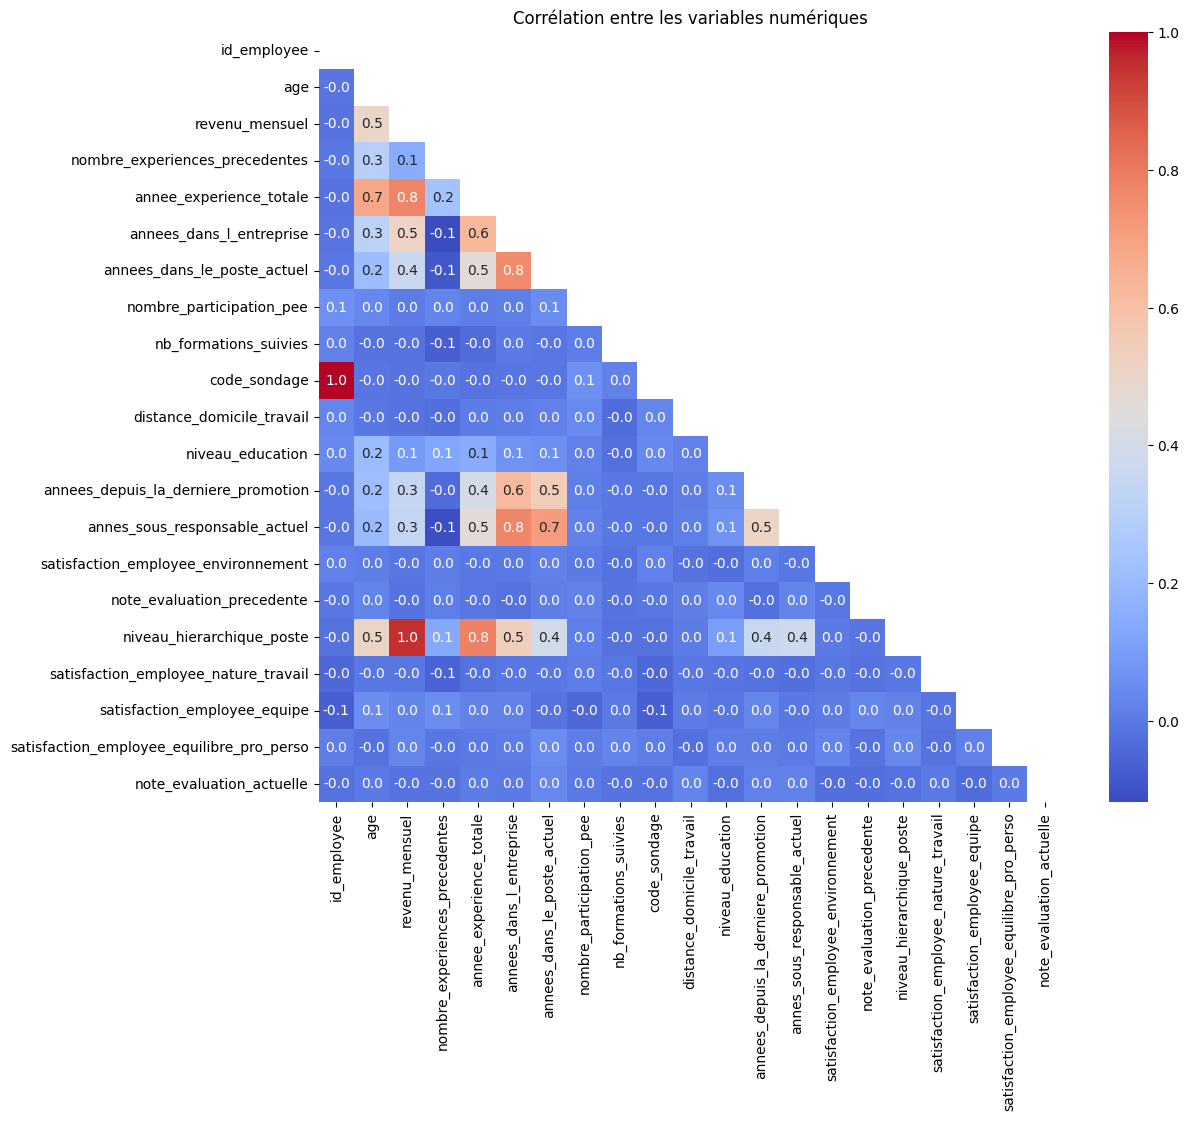

In [21]:
from scipy.stats import f_oneway
# === Corr√©lation entre variables num√©riques ===
corr_matrix = data[quant_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", mask=np.triu(corr_matrix))
plt.title("Corr√©lation entre les variables num√©riques")
plt.show()

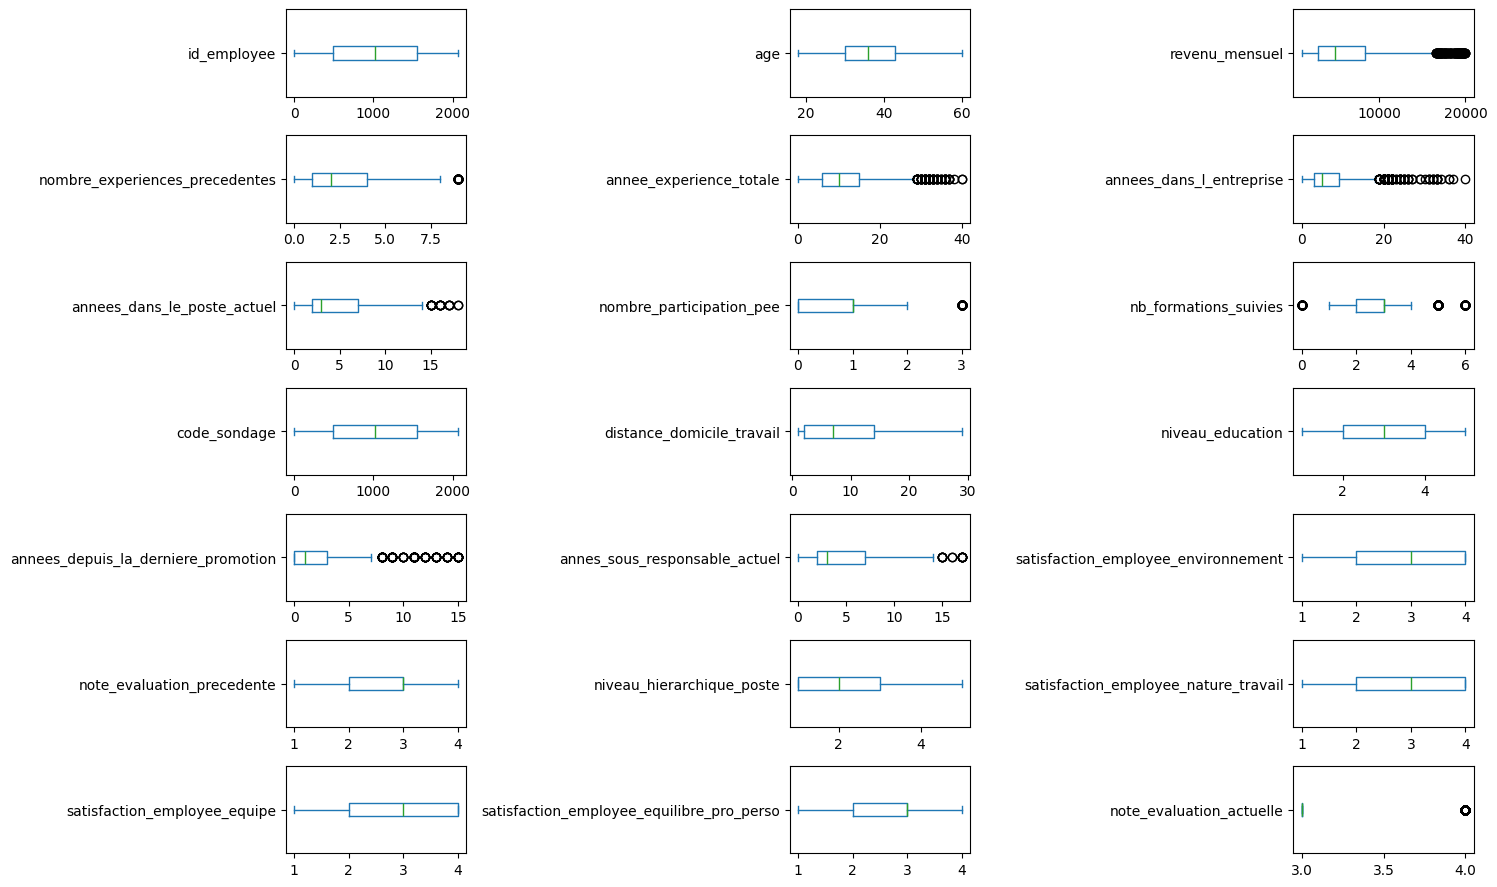

In [22]:
data[quant_features].plot(kind='box', subplots=True, layout=(8, 3), figsize=(15, 10), sharex=False, sharey=False, vert=False)
plt.tight_layout()
plt.show()

### 1- Niveau de revenu

In [23]:
def display_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [24]:
display_outliers(data, 'revenu_mensuel')[['id_employee', 'revenu_mensuel']]

id_employee  revenu_mensuel
25             32           19094
29             38           18947
45             58           19545
62             80           18740
105           140           18844
...           ...             ...
1374         1938           17875
1377         1941           19161
1401         1973           19636
1437         2022           19431
1443         2031           18880

[114 rows x 2 columns]

In [25]:
len (display_outliers(data, 'revenu_mensuel')) / len(data) * 100

7.755102040816326

Nous avons donc 8% d'outliers, ceux ci repr√©sentes les 8% de revenue les plus importants de nos donn√©es, avant de traiter ces outliers, nous allons cr√©er une colonne de classification des niveau de revenu

üìä Classification des niveaux de revenu mensuel net en France (2025)

| Revenu Mensuel (‚Ç¨)        | Cat√©gorie socio-√©conomique      | Description courante                     |
| ------------------------- | ------------------------------- | ---------------------------------------- |
| **< 1 200 ‚Ç¨**             | Tr√®s faible revenu              | Sous le seuil de pauvret√© (env. 1 200 ‚Ç¨) |
| **1 200 ‚Ç¨ ‚Äì 1 500 ‚Ç¨**     | Faible revenu                   | Revenu modeste, aides sociales possibles |
| **1 500 ‚Ç¨ ‚Äì 2 000 ‚Ç¨**     | Bas revenu moyen                | Employ√© √† temps plein, souvent pr√©caire  |
| **2 000 ‚Ç¨ ‚Äì 2 500 ‚Ç¨**     | Revenu moyen                    | Revenu m√©dian en France ‚âà 2 300 ‚Ç¨ net    |
| **2 500 ‚Ç¨ ‚Äì 3 500 ‚Ç¨**     | Bon revenu moyen                | Sup√©rieur √† la m√©diane                   |
| **3 500 ‚Ç¨ ‚Äì 5 000 ‚Ç¨**     | Haut revenu                     | Environ top 10%                          |
| **5 000 ‚Ç¨ ‚Äì 8 000 ‚Ç¨**     | Tr√®s haut revenu                | Environ top 5%                           |
| **8 000 ‚Ç¨ ‚Äì 12 000 ‚Ç¨**    | Ultra haut revenu               | Top 1 %                                  |
| **> 12 000 ‚Ç¨ ‚Äì 20 000 ‚Ç¨** | Exceptionnel (√©lite financi√®re) | Top 0,1 % voire top 0,01 %               |


In [26]:
def classifier_revenu(revenu):
    if revenu < 1200:
        return "Tr√®s faible revenu"
    elif revenu < 1500:
        return "Faible revenu"
    elif revenu < 2000:
        return "Bas revenu moyen"
    elif revenu < 2500:
        return "Revenu moyen"
    elif revenu < 3500:
        return "Bon revenu moyen"
    elif revenu < 5000:
        return "Haut revenu"
    elif revenu < 8000:
        return "Tr√®s haut revenu"
    elif revenu < 12000:
        return "Ultra haut revenu"
    else:
        return "Revenu exceptionnel"
data['classification_revenu'] = data['revenu_mensuel'].apply(classifier_revenu)

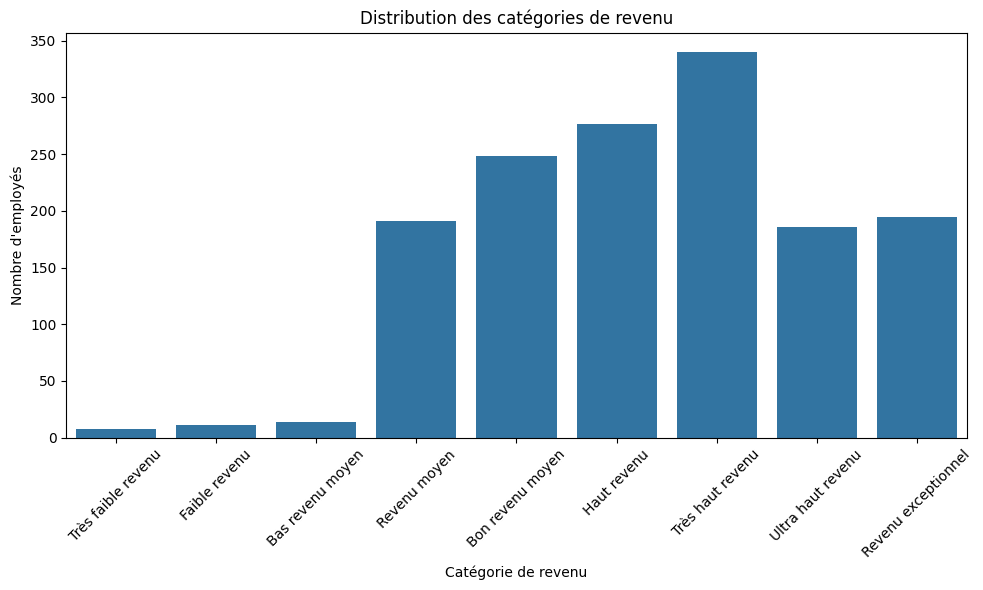

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='classification_revenu', order=[
    "Tr√®s faible revenu", "Faible revenu", "Bas revenu moyen", "Revenu moyen", "Bon revenu moyen",
    "Haut revenu", "Tr√®s haut revenu", "Ultra haut revenu", "Revenu exceptionnel"
])
plt.title("Distribution des cat√©gories de revenu")
plt.xlabel("Cat√©gorie de revenu")
plt.ylabel("Nombre d'employ√©s")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La r√©partition √©tant faite, nous allons proc√©der au traitement des outliers, v√©rifions la distribution sur l'histogramme

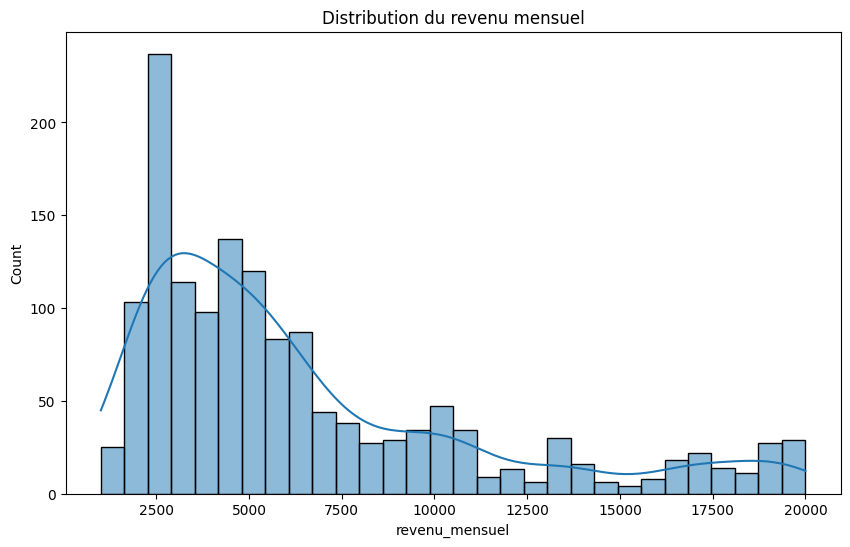

Le skewness du revenu mensuel est de 1.37 et la kurtosis est de 1.01


In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['revenu_mensuel'], bins=30, kde=True)
plt.title("Distribution du revenu mensuel")
plt.show()
print(f"Le skewness du revenu mensuel est de {data['revenu_mensuel'].skew():.2f} et la kurtosis est de {data['revenu_mensuel'].kurtosis():.2f}")

Avec ce skewness sup√©rieur √† 0, on peut donc dire qu'il y'a applatissement des donn√©e sur la droite, et une forte assym√©trie, nous allons donc utiliser une tranformation logarithmique pour le traitement des outliers

In [29]:
# Transformation du revenu mensuel pour r√©duire l'asym√©trie
data['revenu_log'] = np.log1p(data['revenu_mensuel'])

<Axes: xlabel='revenu_log', ylabel='Count'>

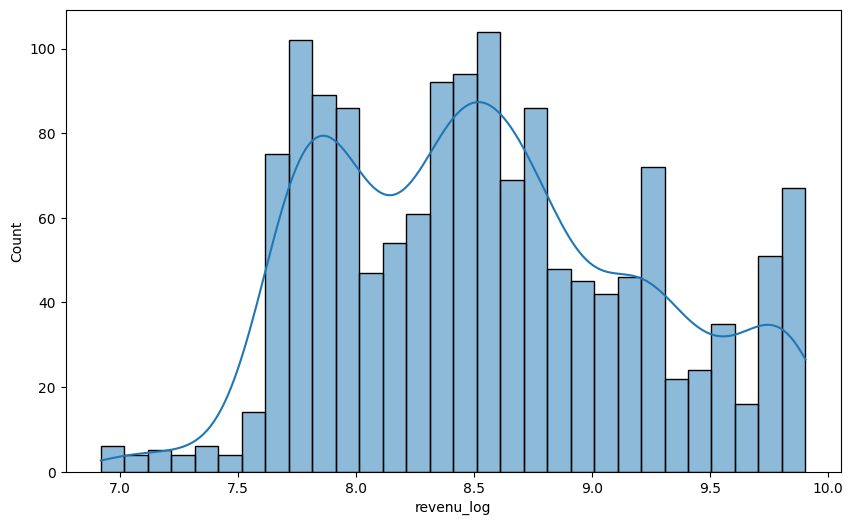

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['revenu_log'], bins=30, kde=True)

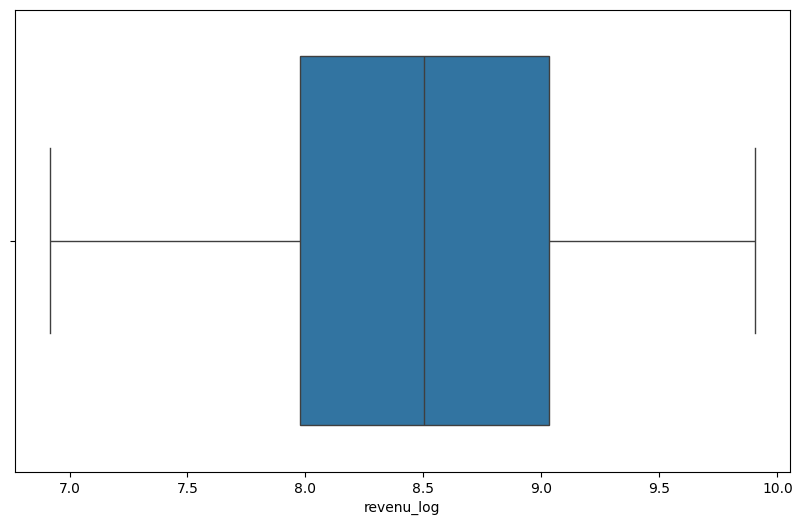

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['revenu_log'])
plt.show()

Nous n'avons plus d'outliers apr√®s transformation logarithmique, cette colonne sera donc utilis√©es au besoin lors de la mod√©lisation, mais pour le moment, nous allons quand m√™me conserver la colonne originale pour la cr√©ation des features lors du feature engineering

### 2- Ann√©e dans l'entreprise

De m√™me nous allons classifier cette feature

| Tranche d'anciennet√© (en ann√©es) | Cat√©gorie                  |
| -------------------------------- | -------------------------- |
| 0 √† 1                            | Nouvel employ√©             |
| 2 √† 3                            | Employ√© junior             |
| 4 √† 6                            | Employ√© interm√©diaire      |
| 7 √† 10                           | Employ√© exp√©riment√©        |
| 11 √† 15                          | Employ√© tr√®s exp√©riment√©   |
| 16 √† 25                          | Employ√© senior             |
| 26 √† 40                          | Employ√© v√©t√©ran            |


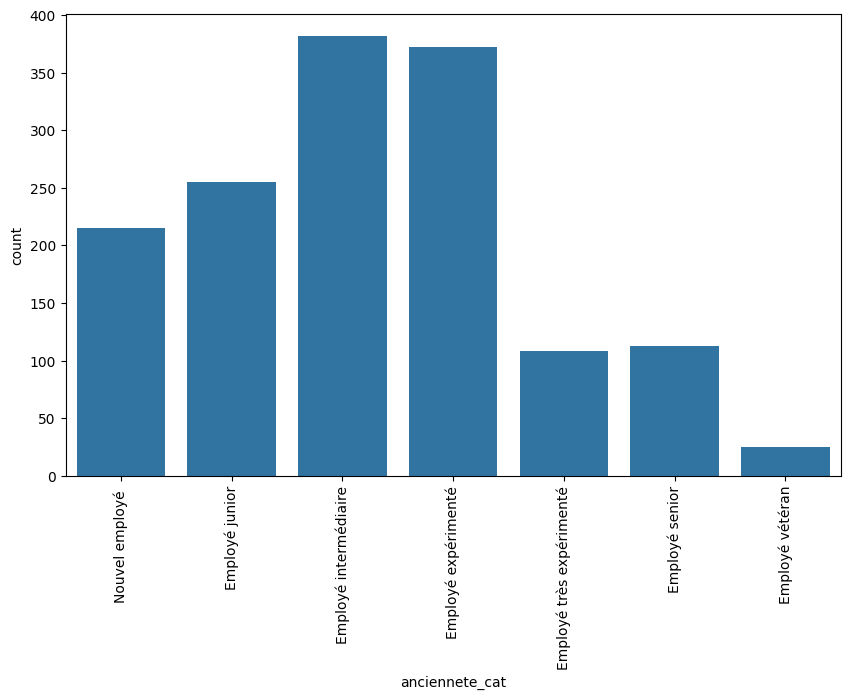

In [32]:
def classifier_anciennete(annees):
    if annees <= 1:
        return "Nouvel employ√© "
    elif annees <= 3:
        return "Employ√© junior"
    elif annees <= 6:
        return "Employ√© interm√©diaire"
    elif annees <= 10:
        return "Employ√© exp√©riment√©"
    elif annees <= 15:
        return "Employ√© tr√®s exp√©riment√©"
    elif annees <= 25:
        return "Employ√© senior"
    else:
        return "Employ√© v√©t√©ran"

data['anciennete_cat'] = data['annees_dans_l_entreprise'].apply(classifier_anciennete)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='anciennete_cat', order=[
    "Nouvel employ√© ", "Employ√© junior", "Employ√© interm√©diaire", "Employ√© exp√©riment√©",
    "Employ√© tr√®s exp√©riment√©", "Employ√© senior", "Employ√© v√©t√©ran"
])
plt.xticks(rotation=90)
plt.show()

<Axes: >

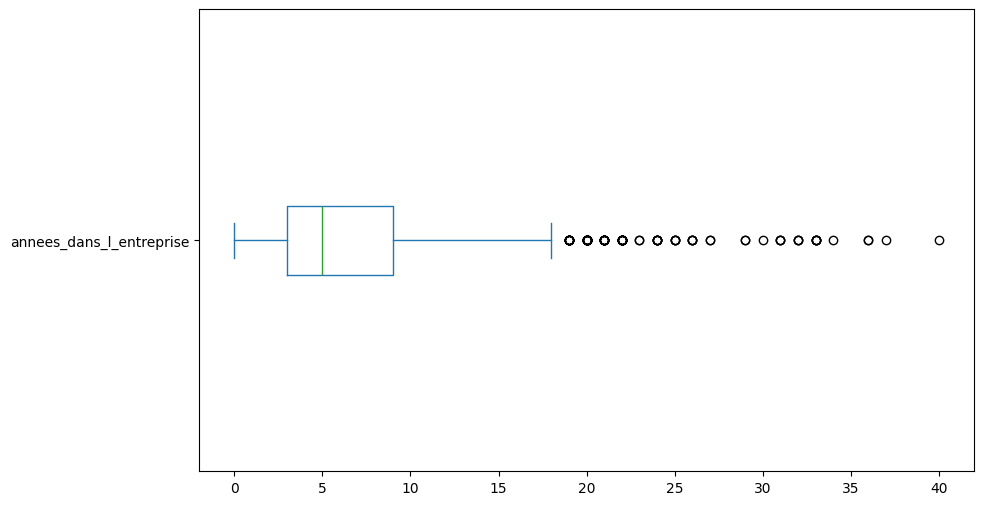

In [33]:
data['annees_dans_l_entreprise'].plot(kind='box', figsize=(10, 6), vert=False)

On observe visuellement qu'il y'a peu d'outliers, on va donc les remplacer par la m√©diane, avant, nous allons v√©rifier la distribution

<Axes: ylabel='Frequency'>

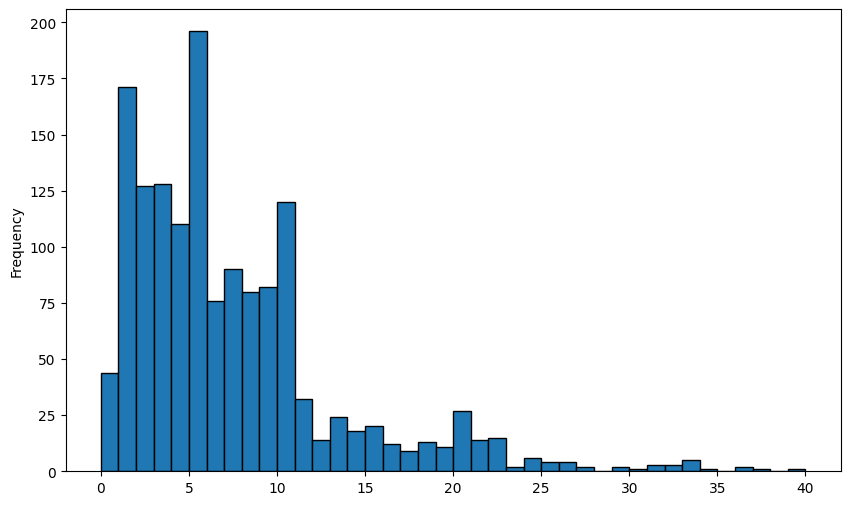

In [34]:
data['annees_dans_l_entreprise'].plot(kind='hist', figsize=(10, 6), bins=40, edgecolor='black')

In [35]:
data['age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [36]:
def remplace_outliers_by_median(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[((df[col] <= lower_bound) | (df[col] >= upper_bound)), col] = df[col].median()
    #return df

In [37]:
remplace_outliers_by_median(data, 'annees_dans_l_entreprise')

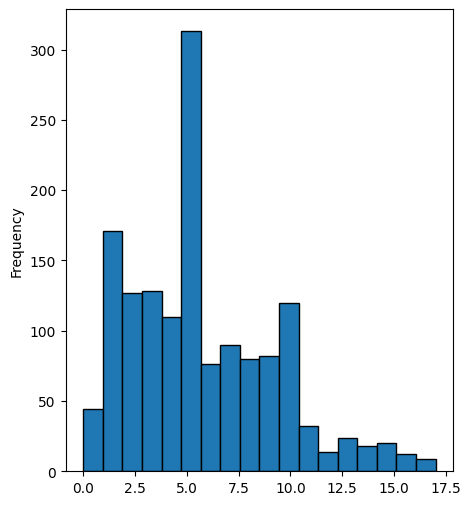

In [38]:
data['annees_dans_l_entreprise'].plot(kind='hist', figsize=(5, 6), bins=18,  edgecolor='black')
plt.show()

On observe que la distribution est rest√©e presque inchang√©e, on a juste la barre de la m√©diane qui a augment√©e, ce qui est logique 

<Axes: >

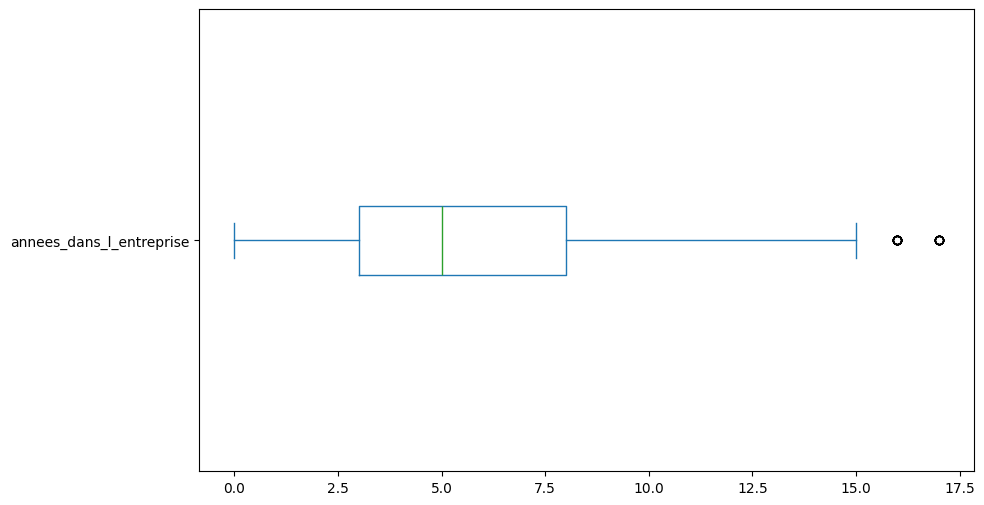

In [39]:
data['annees_dans_l_entreprise'].plot(kind='box', figsize=(10, 6), vert=False)

On peut supprimer les deux derniers outliers 

In [40]:
def del_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [41]:
data = del_outliers(data, 'annees_dans_l_entreprise')

<Axes: >

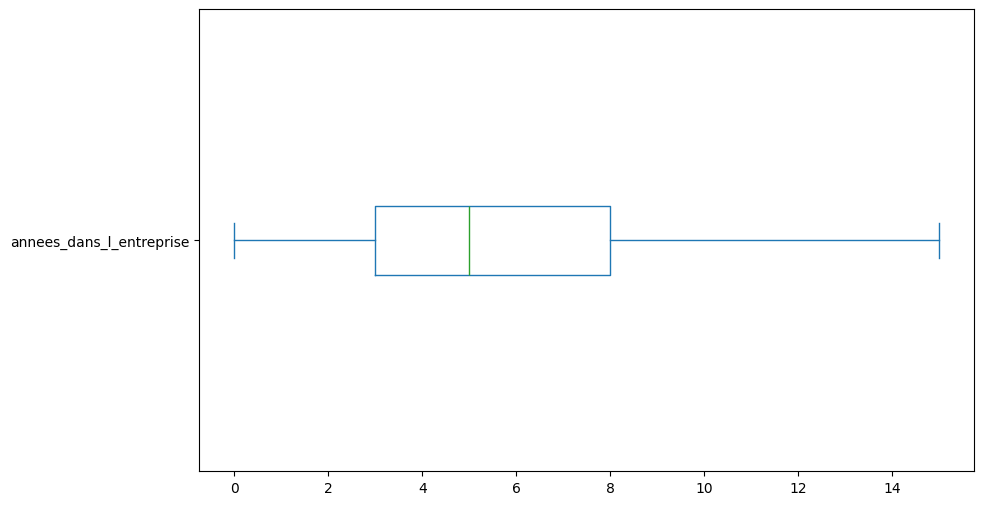

In [42]:
data['annees_dans_l_entreprise'].plot(kind='box', figsize=(10, 6), vert=False)

### 3- Ann√©e exp√©rience total

<Axes: ylabel='Frequency'>

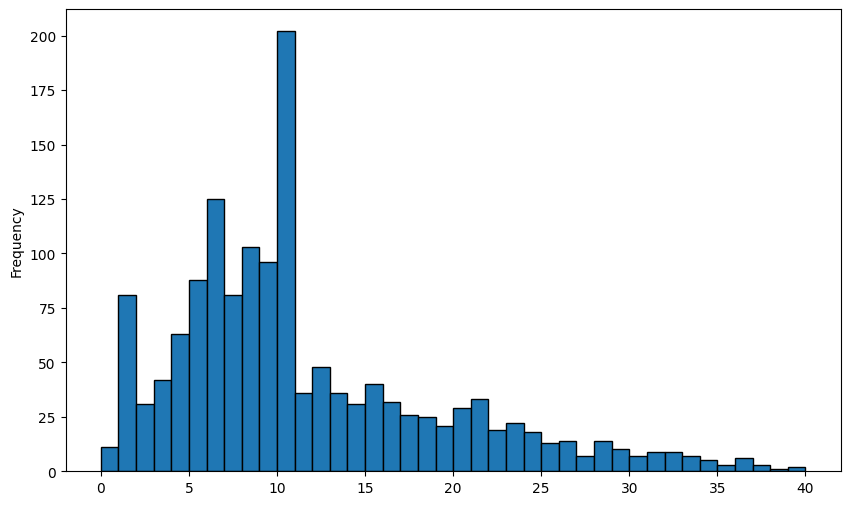

In [43]:
data['annee_experience_totale'].plot(kind='hist', figsize=(10, 6), bins=40, edgecolor='black')

<Axes: >

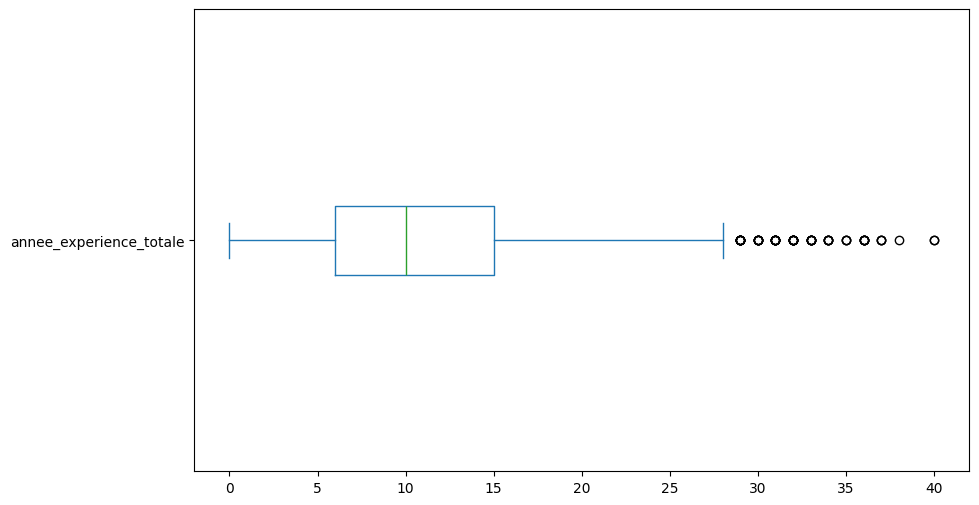

In [44]:
data['annee_experience_totale'].plot(kind='box', figsize=(10, 6), vert=False)

In [45]:
remplace_outliers_by_median(data, 'annee_experience_totale')

In [46]:
data['annee_experience_totale'].median()

np.float64(10.0)

<Axes: ylabel='Frequency'>

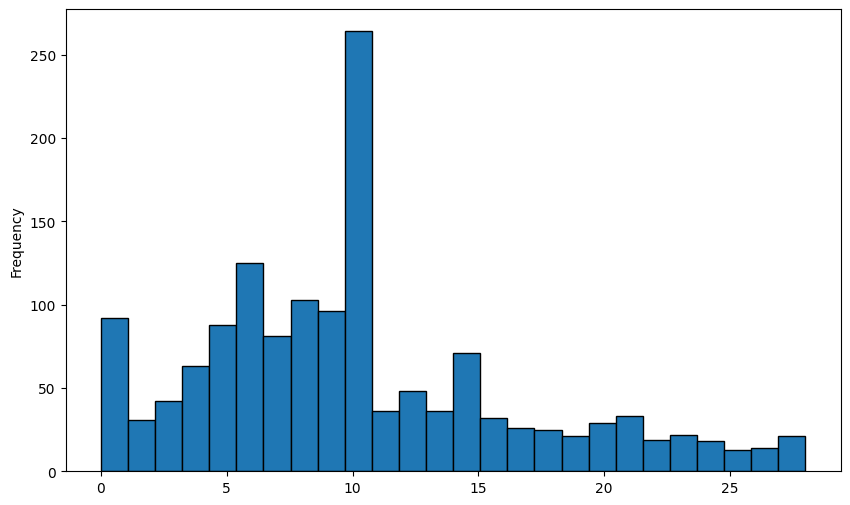

In [47]:
data['annee_experience_totale'].plot(kind='hist', figsize=(10, 6), bins=26,  edgecolor='black')

<Axes: >

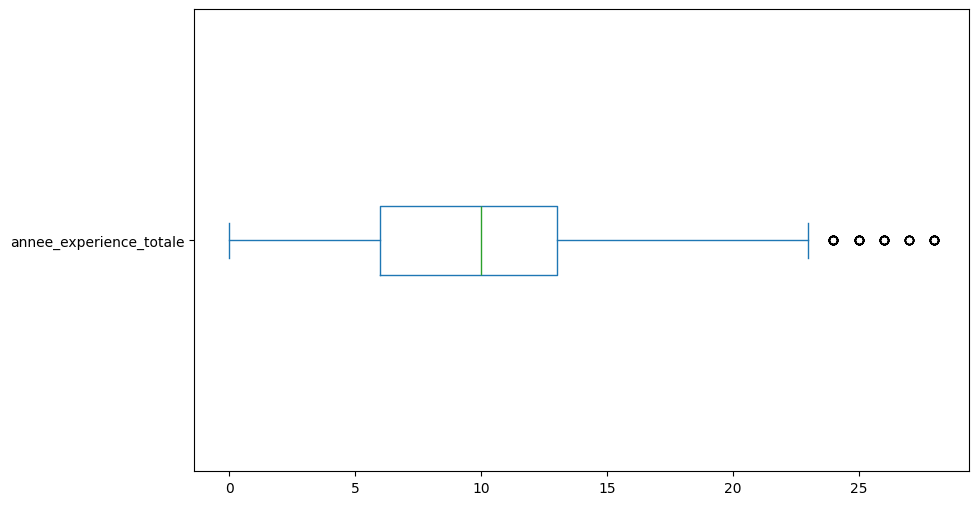

In [48]:
data['annee_experience_totale'].plot(kind='box', figsize=(10, 6), vert=False)

On supprime le reste d'outliers

In [49]:
data = del_outliers(data, 'annee_experience_totale')

<Axes: >

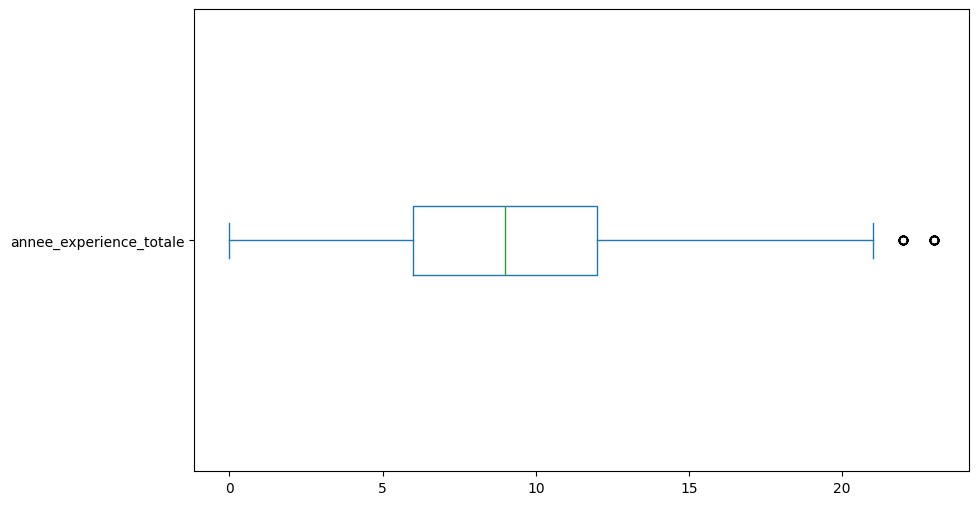

In [50]:
data['annee_experience_totale'].plot(kind='box', figsize=(10, 6), vert=False)

On remplace les outliers restant par les bornes

In [51]:
def remplace_outliers_by_bound(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remplace les valeurs en dehors des bornes par les bornes elles-m√™mes
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound
    

In [52]:
remplace_outliers_by_bound(data, 'annee_experience_totale')

<Axes: >

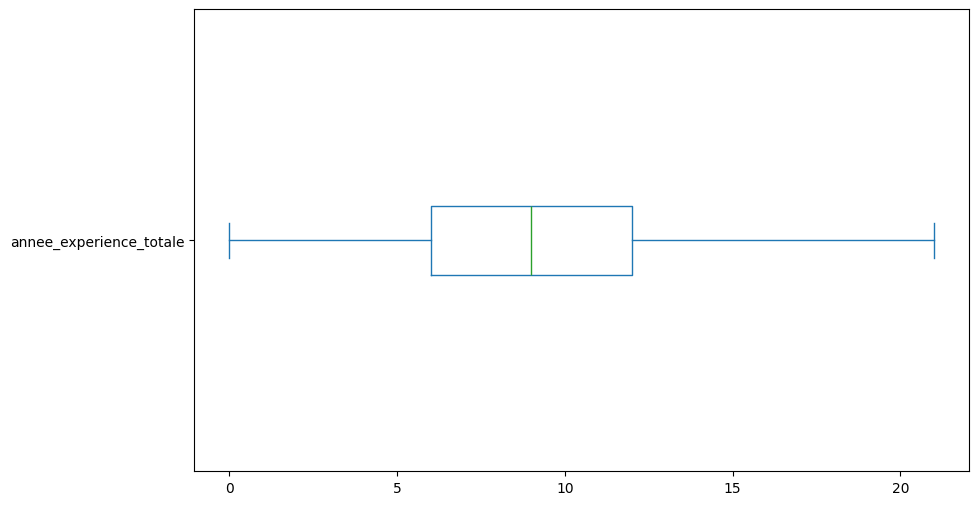

In [53]:
data['annee_experience_totale'].plot(kind='box', figsize=(10, 6), vert=False)

### 4- Nombre d'exp√©rience pr√©c√©dentes

<Axes: >

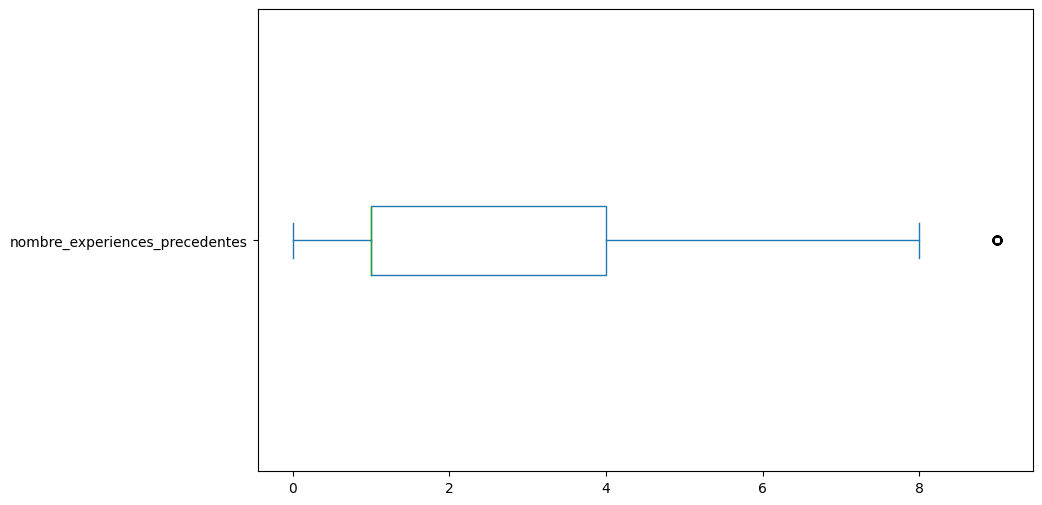

In [54]:
data['nombre_experiences_precedentes'].plot(kind='box', figsize=(10, 6), vert=False)

In [55]:
remplace_outliers_by_median(data, 'nombre_experiences_precedentes')

<Axes: >

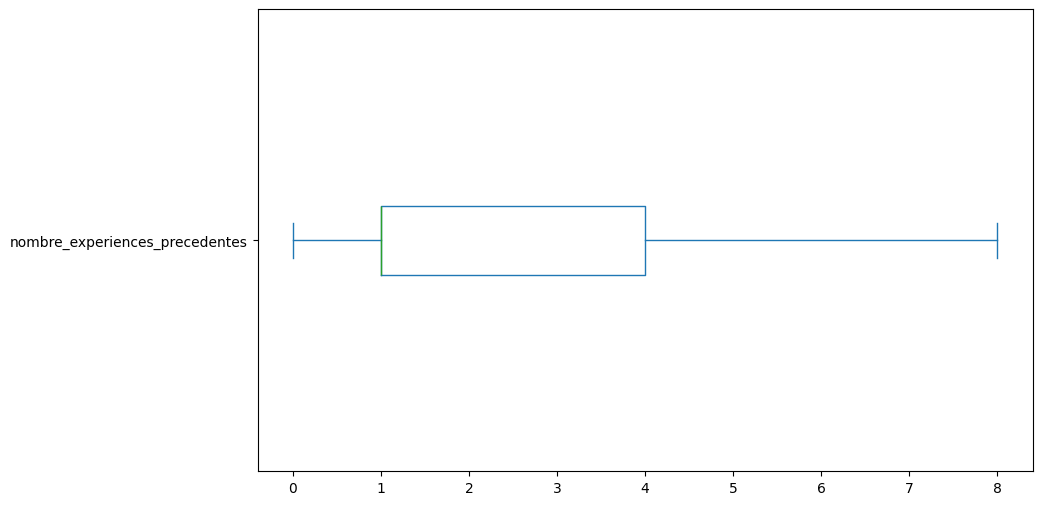

In [56]:
data['nombre_experiences_precedentes'].plot(kind='box', figsize=(10, 6), vert=False)

### 5- Autres features li√©es aux ann√©es

In [57]:
remplace_outliers_by_median(data, 'annees_dans_le_poste_actuel')
remplace_outliers_by_median(data, 'annees_depuis_la_derniere_promotion')
remplace_outliers_by_median(data, 'annes_sous_responsable_actuel')

### 6- Visualisation g√©n√©rale 

In [58]:
quant_features = data.select_dtypes(include=np.number).columns.tolist()

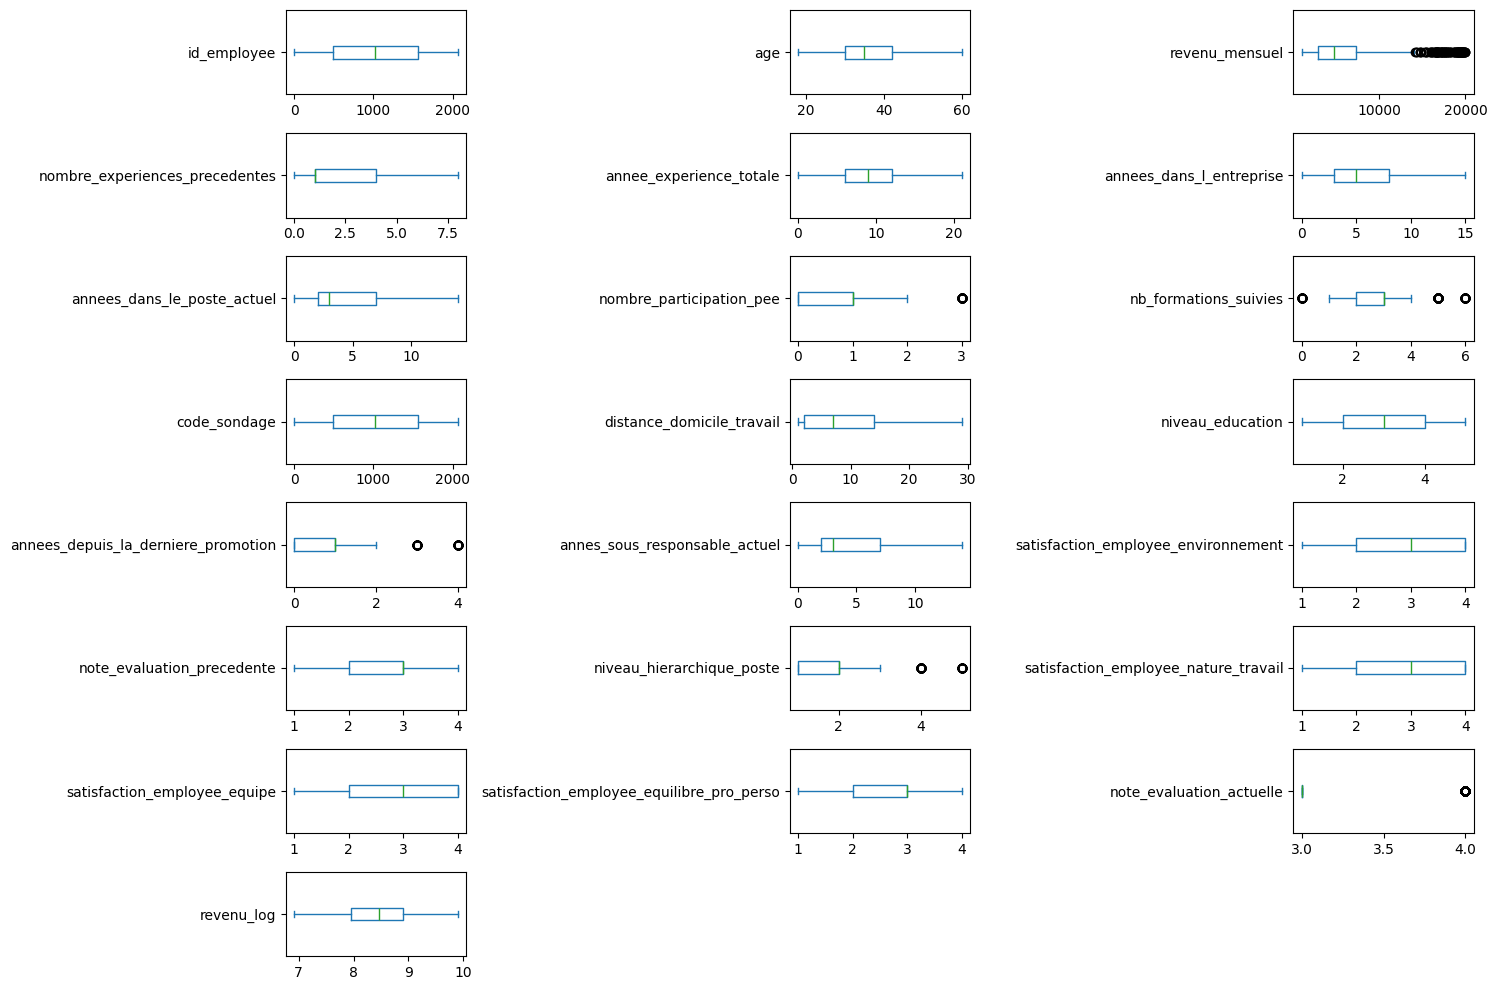

In [59]:
data[quant_features].plot(kind='box', subplots=True, layout=(8, 3), figsize=(15, 10), sharex=False, sharey=False, vert=False)
plt.tight_layout()
plt.show()

Nous avons proc√©d√© au nettoyage des outliers sur les colonnes principales afin de garantir la qualit√© de nos donn√©es.
Toutefois, afin d‚Äô√©viter toute perte d‚Äôinformation, nous avons choisi de conserver les valeurs extr√™mes pr√©sentes dans les autres variables.
En effet, certaines colonnes comme nombre_participation_pee ne comportent que quelques modalit√©s (0, 1, 2, 3). Bien que la valeur 3 soit d√©tect√©e comme un outlier selon le boxplot, la supprimer ou la remplacer par la m√©diane reviendrait √† appauvrir significativement la diversit√© de cette variable.
Dans cette logique, nous avons donc d√©cid√© de pr√©server l‚Äôint√©gralit√© des donn√©es sur les autres features, car leur modification pourrait nuire √† la richesse informative n√©cessaire √† un bon apprentissage du mod√®le.

### 7- V√©rification des corr√©lations

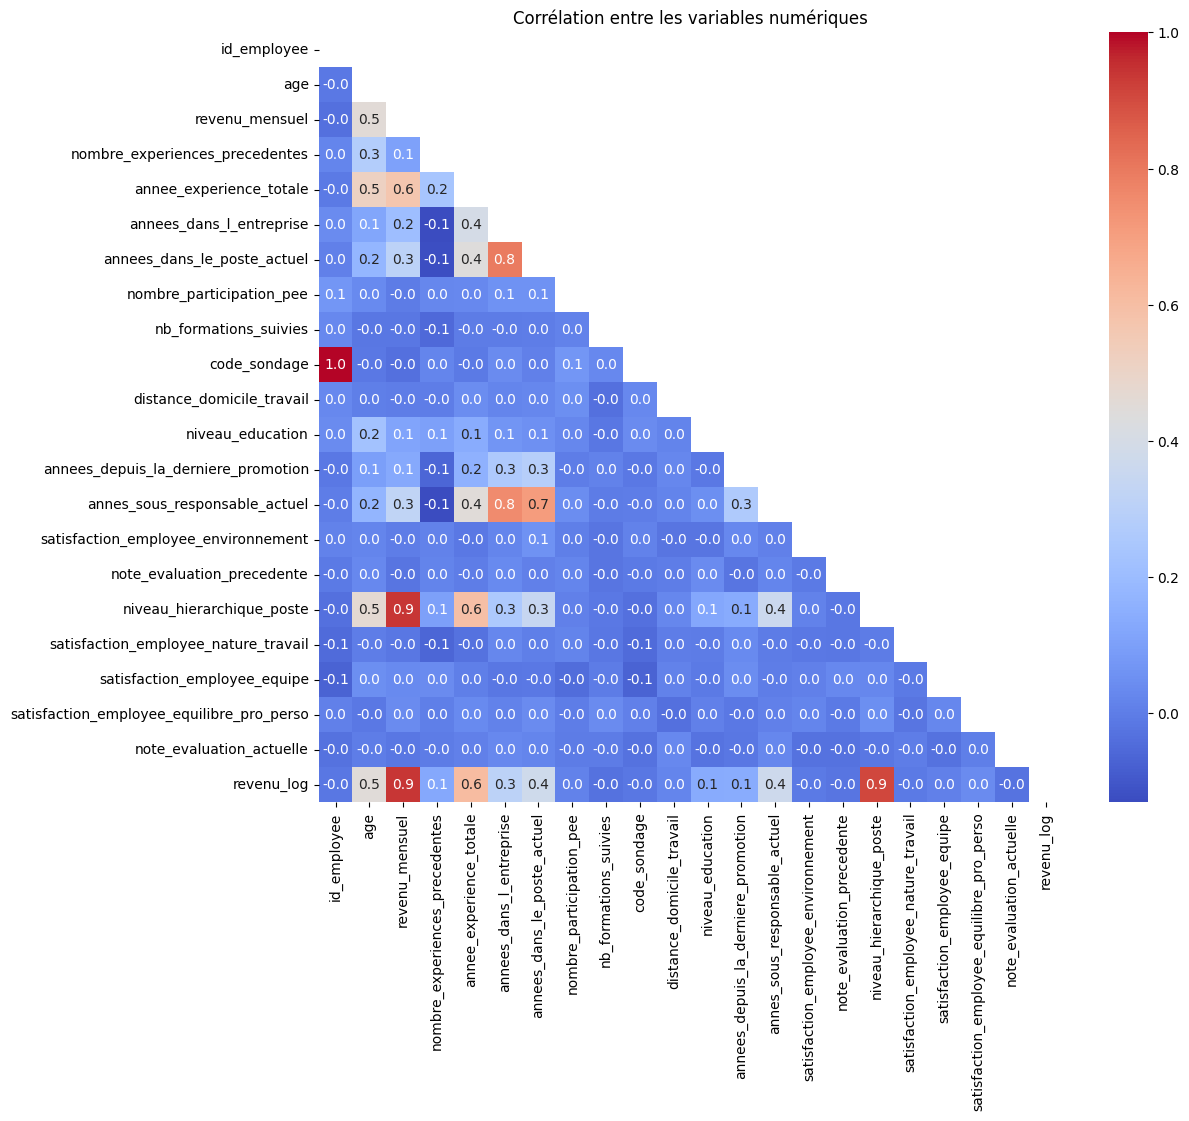

In [60]:
from scipy.stats import f_oneway
# === Corr√©lation entre variables num√©riques ===
corr_matrix = data[quant_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", mask=np.triu(corr_matrix))
plt.title("Corr√©lation entre les variables num√©riques")
plt.show()

**Interpr√©tations des fortes corr√©lations**

Il y'a une forte corr√©lation entre : 

- "code sondage" et "id employ√©", ces deux colonnes ne seront pas utiles pour la mod√©lisation, nous pouvons donc ne pas les prendre en compte ou tout simplement retirer "code sondage"
- "niveau hierachique" et "revenu mensuel" ceci semble logique dans le sens o√π le salaire augmente avec le niveau de poste, mais nous n'allons pas retirer ces colonnes qui nous servirons pour le feature engineering.
- "revenu mensuel" et "revenu log" ce qui est logique car "revenu log" est juste la transformation logarithmique de "revenu mensuel" pas n√©cessaire de retirer car l'une vas nous servir pour le feature engineering et l'autre pour la mod√©lisation

In [61]:
data.drop(columns='code_sondage', inplace=True)

In [62]:
quant_features = data.select_dtypes(include=np.number).columns.tolist()

## VI- Traitement des valeurs manquantes et doublons

### 1- Valeurs manquantes

In [63]:
def number_of_na (df, columns):
    for elt in columns:
        df[elt].isna().sum()
        #print(f"Nombre de valeurs manquantes dans {elt} : {df[elt].isna().sum()}")
        print(f"Pourcentage de valeurs manquantes dans {elt} : {df[elt].isna().sum()/len(df)*100:.2f}%")

In [64]:
number_of_na(data, quant_features)

Pourcentage de valeurs manquantes dans id_employee : 0.00%
Pourcentage de valeurs manquantes dans age : 0.00%
Pourcentage de valeurs manquantes dans revenu_mensuel : 0.00%
Pourcentage de valeurs manquantes dans nombre_experiences_precedentes : 0.00%
Pourcentage de valeurs manquantes dans annee_experience_totale : 0.00%
Pourcentage de valeurs manquantes dans annees_dans_l_entreprise : 0.00%
Pourcentage de valeurs manquantes dans annees_dans_le_poste_actuel : 0.00%
Pourcentage de valeurs manquantes dans nombre_participation_pee : 0.00%
Pourcentage de valeurs manquantes dans nb_formations_suivies : 0.00%
Pourcentage de valeurs manquantes dans distance_domicile_travail : 0.00%
Pourcentage de valeurs manquantes dans niveau_education : 0.00%
Pourcentage de valeurs manquantes dans annees_depuis_la_derniere_promotion : 0.00%
Pourcentage de valeurs manquantes dans annes_sous_responsable_actuel : 0.00%
Pourcentage de valeurs manquantes dans satisfaction_employee_environnement : 0.00%
Pourcentage

In [65]:
number_of_na(data, qual_features)

Pourcentage de valeurs manquantes dans genre : 0.00%
Pourcentage de valeurs manquantes dans statut_marital : 0.00%
Pourcentage de valeurs manquantes dans departement : 0.00%
Pourcentage de valeurs manquantes dans poste : 0.00%
Pourcentage de valeurs manquantes dans a_quitte_l_entreprise : 0.00%
Pourcentage de valeurs manquantes dans domaine_etude : 0.00%
Pourcentage de valeurs manquantes dans frequence_deplacement : 0.00%
Pourcentage de valeurs manquantes dans eval_number : 0.00%
Pourcentage de valeurs manquantes dans heure_supplementaires : 0.00%
Pourcentage de valeurs manquantes dans augementation_salaire_precedente : 0.00%


Il n'y a pas de valeur manquantes

### 2- Doublons

#### a) Doublon sur l'identifiant

In [66]:
data.loc[data['id_employee'].duplicated()]

Empty DataFrame
Columns: [id_employee, age, genre, revenu_mensuel, statut_marital, departement, poste, nombre_experiences_precedentes, annee_experience_totale, annees_dans_l_entreprise, annees_dans_le_poste_actuel, a_quitte_l_entreprise, nombre_participation_pee, nb_formations_suivies, distance_domicile_travail, niveau_education, domaine_etude, frequence_deplacement, annees_depuis_la_derniere_promotion, annes_sous_responsable_actuel, satisfaction_employee_environnement, note_evaluation_precedente, niveau_hierarchique_poste, satisfaction_employee_nature_travail, satisfaction_employee_equipe, satisfaction_employee_equilibre_pro_perso, eval_number, note_evaluation_actuelle, heure_supplementaires, augementation_salaire_precedente, classification_revenu, revenu_log, anciennete_cat]
Index: []

[0 rows x 33 columns]

#### b) Doublon sur l'ensemble des colonnes sauf id

In [67]:
data.columns

Index(['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital',
       'departement', 'poste', 'nombre_experiences_precedentes',
       'annee_experience_totale', 'annees_dans_l_entreprise',
       'annees_dans_le_poste_actuel', 'a_quitte_l_entreprise',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education', 'domaine_etude',
       'frequence_deplacement', 'annees_depuis_la_derniere_promotion',
       'annes_sous_responsable_actuel', 'satisfaction_employee_environnement',
       'note_evaluation_precedente', 'niveau_hierarchique_poste',
       'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'eval_number',
       'note_evaluation_actuelle', 'heure_supplementaires',
       'augementation_salaire_precedente', 'classification_revenu',
       'revenu_log', 'anciennete_cat'],
      dtype='object')

In [68]:
features = ['age', 'genre', 'revenu_mensuel', 'statut_marital',
       'departement', 'poste', 'nombre_experiences_precedentes',
       'annee_experience_totale', 'annees_dans_l_entreprise',
       'annees_dans_le_poste_actuel', 'a_quitte_l_entreprise',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education', 'domaine_etude',
       'frequence_deplacement', 'annees_depuis_la_derniere_promotion',
       'annes_sous_responsable_actuel', 'satisfaction_employee_environnement',
       'note_evaluation_precedente', 'niveau_hierarchique_poste',
       'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'eval_number',
       'note_evaluation_actuelle', 'heure_supplementaires',
       'augementation_salaire_precedente', 'classification_revenu',
       'revenu_log', 'anciennete_cat']

In [69]:
data.loc[data[features].duplicated(keep=False)]

Empty DataFrame
Columns: [id_employee, age, genre, revenu_mensuel, statut_marital, departement, poste, nombre_experiences_precedentes, annee_experience_totale, annees_dans_l_entreprise, annees_dans_le_poste_actuel, a_quitte_l_entreprise, nombre_participation_pee, nb_formations_suivies, distance_domicile_travail, niveau_education, domaine_etude, frequence_deplacement, annees_depuis_la_derniere_promotion, annes_sous_responsable_actuel, satisfaction_employee_environnement, note_evaluation_precedente, niveau_hierarchique_poste, satisfaction_employee_nature_travail, satisfaction_employee_equipe, satisfaction_employee_equilibre_pro_perso, eval_number, note_evaluation_actuelle, heure_supplementaires, augementation_salaire_precedente, classification_revenu, revenu_log, anciennete_cat]
Index: []

[0 rows x 33 columns]

Il n'y a pas de doublon dans les donn√©es 

### 3- S√©paration de la cible du reste du dataset

In [70]:
data_cible = pd.DataFrame(data[['id_employee', 'a_quitte_l_entreprise']]) 

In [71]:
data.drop(columns='a_quitte_l_entreprise', inplace=True)

In [72]:
qual_features = data.select_dtypes(exclude=np.number).columns.tolist()

# ETAPE 2: PREPARATION DES DONNEES POUR LA MODELISATION

## I- Encodage des features qualitatives

In [73]:
data_encoded = data.copy()

In [74]:
data_encoded[qual_features].head()

genre statut_marital departement                   poste  \
0     F    C√©libataire  Commercial        Cadre Commercial   
1     M       Mari√©(e)  Consulting  Assistant de Direction   
2     M    C√©libataire  Consulting              Consultant   
3     F       Mari√©(e)  Consulting  Assistant de Direction   
4     M       Mari√©(e)  Consulting              Consultant   

             domaine_etude frequence_deplacement eval_number  \
0            Infra & Cloud           Occasionnel         E_1   
1            Infra & Cloud              Frequent         E_2   
2                    Autre           Occasionnel         E_4   
3            Infra & Cloud              Frequent         E_5   
4  Transformation Digitale           Occasionnel         E_7   

  heure_supplementaires augementation_salaire_precedente  \
0                   Oui                             11 %   
1                   Non                             23 %   
2                   Oui                             15 %   
3                   Oui                             11 %   
4                   Non                             12 %   

  classification_revenu         anciennete_cat  
0      Tr√®s haut revenu  Employ√© interm√©diaire  
1      Tr√®s haut revenu    Employ√© exp√©riment√©  
2          Revenu moyen        Nouvel employ√©   
3      Bon revenu moyen    Employ√© exp√©riment√©  
4      Bon revenu moyen         Employ√© junior

In [75]:
data_encoded['eval_number'].head(59)

0      E_1
1      E_2
2      E_4
3      E_5
4      E_7
5      E_8
6     E_10
7     E_11
8     E_12
9     E_13
10    E_14
11    E_15
12    E_16
13    E_18
14    E_19
15    E_20
16    E_21
17    E_22
18    E_23
19    E_24
20    E_26
21    E_27
22    E_28
23    E_30
24    E_31
26    E_33
27    E_35
29    E_38
30    E_39
31    E_40
32    E_41
33    E_42
34    E_45
35    E_46
36    E_47
37    E_49
38    E_51
39    E_52
40    E_53
41    E_54
42    E_55
43    E_56
44    E_57
45    E_58
46    E_60
47    E_61
48    E_62
49    E_63
50    E_64
51    E_65
52    E_68
53    E_70
54    E_72
55    E_73
56    E_74
57    E_75
58    E_76
59    E_77
60    E_78
Name: eval_number, dtype: object

Nous pouvons supprimer la colonne 'eval_number' car elle n'apporte pas d'information, √† priori c'est un remplissage automatique car les chiffre sont ordonn√©s, on peut la supprimer

In [76]:
data_encoded.drop(columns='eval_number', inplace=True)

#### a) 'augementation_salaire_precedente'

Transformons la colonne 'augmentation de salaire pr√©c√©dent' en valeur num√©rique

In [77]:
data_encoded['augmentation_salaire_precedent(%)'] = data_encoded['augementation_salaire_precedente'].str.split(' ', n=1, expand=True)[0]

In [78]:
data_encoded['augmentation_salaire_precedent(%)']  = pd.to_numeric(data_encoded['augmentation_salaire_precedent(%)'])

In [79]:
data_encoded.drop(columns='augementation_salaire_precedente', inplace=True)

In [80]:
data_encoded['augmentation_salaire_precedent(%)']

0       11
1       23
2       15
3       11
4       12
        ..
1465    17
1466    15
1467    20
1468    14
1469    12
Name: augmentation_salaire_precedent(%), Length: 1383, dtype: int64

In [81]:
qual_features = data_encoded.select_dtypes(exclude=np.number).columns.tolist()
quant_features = data_encoded.select_dtypes(include=np.number).columns.tolist()

#### b) OrdinalEncoder

In [82]:
qual_features

['genre',
 'statut_marital',
 'departement',
 'poste',
 'domaine_etude',
 'frequence_deplacement',
 'heure_supplementaires',
 'classification_revenu',
 'anciennete_cat']

In [83]:
col_to_ordinal = ['frequence_deplacement', 'classification_revenu',  'anciennete_cat' ]

In [84]:
def appliquer_ordinal_encoding(df):
    # D√©finir l‚Äôordre des cat√©gories pour chaque colonne √† encoder
    ordre_dict = {'frequence_deplacement': ['Aucun', 'Occasionnel', 'Frequent'],
                  
                 'classification_revenu': ['Tr√®s faible revenu', 'Faible revenu', 'Bas revenu moyen',
                                    'Revenu moyen', 'Bon revenu moyen', 'Haut revenu',
                                    'Tr√®s haut revenu', 'Ultra haut revenu', 'Revenu exceptionnel'],

                 'anciennete_cat': ['Nouvel employ√© ','Employ√© junior','Employ√© interm√©diaire','Employ√© exp√©riment√©',
                            'Employ√© tr√®s exp√©riment√©','Employ√© senior','Employ√© v√©t√©ran']
                }
    
    for col, order in ordre_dict.items():
        if col in df.columns:
            oe = OrdinalEncoder(categories=[order])
            encoded_values = oe.fit_transform(df[[col]])
            df[f"{col}_encoded"] = encoded_values.astype(int)
        else:
            print(f"‚ö†Ô∏è Colonne '{col}' non trouv√©e dans le DataFrame.")

    return df


In [85]:
data_encoded = appliquer_ordinal_encoding(data_encoded)

In [86]:
data_encoded.drop(columns=col_to_ordinal, inplace=True )

#### c) OneHotEncoder

In [87]:
col_to_onehot = ['genre', 'statut_marital', 'departement', 'poste','domaine_etude', 'heure_supplementaires']

In [91]:
def appliquer_onehot_encoding(df, colonnes):

    # S√©lectionner uniquement les colonnes existantes dans le DataFrame
    colonnes_existantes = [col for col in colonnes if col in df.columns]

    if colonnes_existantes:
        ohe = OneHotEncoder(sparse_output=False, drop=None)
        encodage = ohe.fit_transform(df[colonnes_existantes])

        # Cr√©er les noms de colonnes encod√©es
        noms_colonnes = ohe.get_feature_names_out(colonnes_existantes)

        # Cr√©er un DataFrame avec les colonnes encod√©es
        df_encoded = pd.DataFrame(encodage, columns=noms_colonnes, index=df.index)

        # Concat√©ner avec le DataFrame d‚Äôorigine
        df = pd.concat([df, df_encoded], axis=1)
    else:
        print("‚ö†Ô∏è Aucune des colonnes sp√©cifi√©es n‚Äôest pr√©sente dans le DataFrame.")

    return df


In [92]:
#.drop(columns=colonnes_existantes)

In [93]:
data_encoded = appliquer_onehot_encoding(data_encoded, col_to_onehot)

In [94]:
data_encoded.drop(columns=['genre', 'statut_marital', 'departement', 'domaine_etude', 'heure_supplementaires'], inplace=True)

In [95]:
data_encoded.columns

Index(['id_employee', 'age', 'revenu_mensuel', 'poste',
       'nombre_experiences_precedentes', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education',
       'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle',
       'revenu_log', 'augmentation_salaire_precedent(%)',
       'frequence_deplacement_encoded', 'classification_revenu_encoded',
       'anciennete_cat_encoded', 'genre_F', 'genre_M',
       'statut_marital_C√©libataire', 'statut_marital_Divorc√©(e)',
       'statut_marital_Mari√©(e)', 'departement_Commercial',
       'departement_Consultin

#### d) LabelEncoder (Pour la cible)

In [96]:
data_cible_encoded = data_cible.copy()

In [97]:
le = LabelEncoder()

In [98]:
data_cible_encoded

id_employee a_quitte_l_entreprise
0               1                   Oui
1               2                   Non
2               4                   Oui
3               5                   Non
4               7                   Non
...           ...                   ...
1465         2061                   Non
1466         2062                   Non
1467         2064                   Non
1468         2065                   Non
1469         2068                   Non

[1383 rows x 2 columns]

In [99]:
data_cible_encoded['a_quitte_l_entreprise_encoded'] = le.fit_transform(data_cible_encoded['a_quitte_l_entreprise'])

In [100]:
data_cible_encoded.drop(columns=['a_quitte_l_entreprise'], inplace=True)

In [101]:
for i, cls in enumerate(le.classes_):
    print(f"{cls} => {i}")


Non => 0
Oui => 1


In [102]:
data_cible_encoded["a_quitte_l_entreprise(Oui=1, Non=0)"] = data_cible_encoded['a_quitte_l_entreprise_encoded']
data_cible_encoded.drop(columns='a_quitte_l_entreprise_encoded', inplace=True)

In [103]:
data_cible_encoded

id_employee  a_quitte_l_entreprise(Oui=1, Non=0)
0               1                                    1
1               2                                    0
2               4                                    1
3               5                                    0
4               7                                    0
...           ...                                  ...
1465         2061                                    0
1466         2062                                    0
1467         2064                                    0
1468         2065                                    0
1469         2068                                    0

[1383 rows x 2 columns]

In [104]:
data_encoded.columns

Index(['id_employee', 'age', 'revenu_mensuel', 'poste',
       'nombre_experiences_precedentes', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education',
       'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle',
       'revenu_log', 'augmentation_salaire_precedent(%)',
       'frequence_deplacement_encoded', 'classification_revenu_encoded',
       'anciennete_cat_encoded', 'genre_F', 'genre_M',
       'statut_marital_C√©libataire', 'statut_marital_Divorc√©(e)',
       'statut_marital_Mari√©(e)', 'departement_Commercial',
       'departement_Consultin

## II- V√©rification des compostantes principales 

In [105]:
data_encoded_cp = data_encoded.copy()

In [106]:
data_encoded_cp.drop(columns=['id_employee', 'poste'], inplace=True)

### 1- Cluster

L'objectif ici est de v√©rifier si les employ√© ayant d√©missionn√© se rassemble et de trouver donc les liens qui les unissent

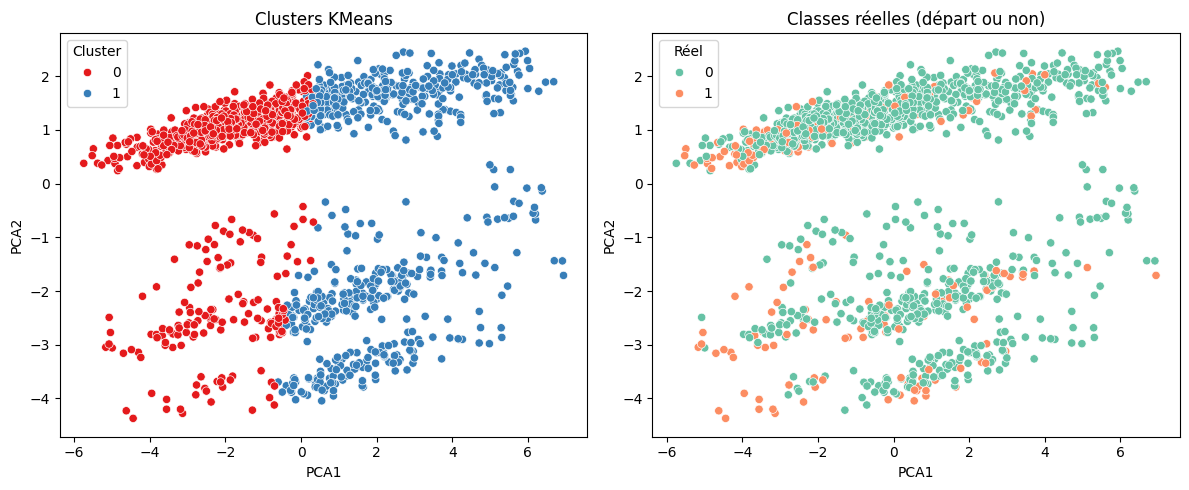

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# === 1. Pr√©paration des donn√©es ===
X = data_encoded_cp.copy()  # Les variables explicatives (sans la cible)
y = data_cible_encoded['a_quitte_l_entreprise(Oui=1, Non=0)'].copy()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Clustering KMeans ===
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# === 3. PCA pour visualisation en 2D ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === 4. Assemblage dans un DataFrame ===
df_clusters = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_clusters['Cluster'] = clusters
df_clusters['R√©el'] = y.values  # ou .to_numpy()

# === 5. Visualisation comparative ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clusters, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Clusters KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clusters, x='PCA1', y='PCA2', hue='R√©el', palette='Set2')
plt.title('Classes r√©elles (d√©part ou non)')

plt.tight_layout()
plt.show()


On constate en effet sur les classes r√©elles que les employ√©s ayant d√©missionn√©s ont tendance √† se regrouper vers la gauche, nous allons donc trouver l'explication de ce regroupement pour ces les deux premi√®res composantes principales

### 2- Cercle de corr√©lation pour la PC1 et PC2

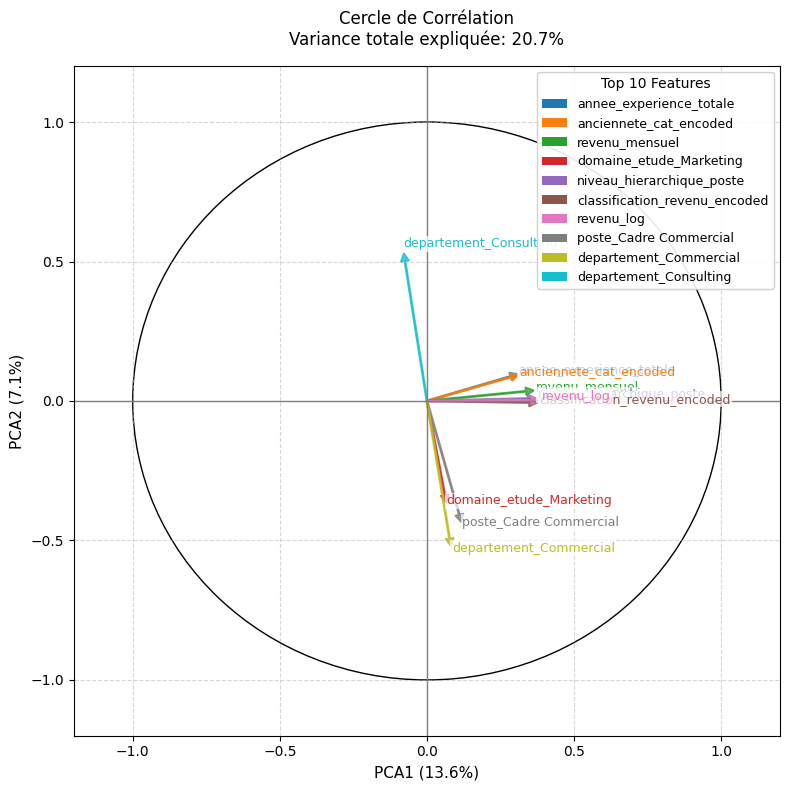

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Patch

# 1. Donn√©es
X = data_encoded_cp.copy()
feature_names = X.columns

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
components = pca.components_  # (2, n_features)

# Calcul des pourcentages de variance expliqu√©e
explained_var_ratio = pca.explained_variance_ratio_ * 100

# 4. Calcul des normes pour s√©lectionner les 10 variables les plus importantes
norms = np.sqrt(components[0,:]**2 + components[1,:]**2)
top_10_indices = np.argsort(norms)[-10:]  # Indices des 10 plus grandes normes

# 5. Cercle de corr√©lation avec l√©gende int√©gr√©e
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

# Palette de couleurs pour les 10 features
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Trac√© des fl√®ches et pr√©paration de la l√©gende
legend_elements = []
for j, i in enumerate(top_10_indices):
    x = components[0, i]
    y = components[1, i]
    # Trac√© de la fl√®che
    plt.arrow(0, 0, x, y, 
             head_width=0.03, 
             head_length=0.03, 
             fc=colors[j],
             ec=colors[j],
             alpha=0.8,
             width=0.005)
    # Texte avec fond blanc pour lisibilit√©
    plt.text(x * 1.1, y * 1.1, feature_names[i], 
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
            color=colors[j])
    
    # √âl√©ments pour la l√©gende
    legend_elements.append(Patch(facecolor=colors[j],
                               label=feature_names[i]))

# Ajout de la l√©gende dans le cercle
plt.legend(handles=legend_elements,
          loc='upper right',
          fontsize=9,
          title="Top 10 Features",
          title_fontsize=10,
          framealpha=0.9)

plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# Labels avec pourcentages
plt.xlabel(f'PCA1 ({explained_var_ratio[0]:.1f}%)', fontsize=11)
plt.ylabel(f'PCA2 ({explained_var_ratio[1]:.1f}%)', fontsize=11)

# Titre avec variance totale
plt.title(f'Cercle de Corr√©lation\nVariance totale expliqu√©e: {sum(explained_var_ratio):.1f}%',
         fontsize=12, pad=15)

plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Analyse des composantes principales :**

1. **Premi√®re composante (PCA1) - Axe horizontal** :
   - Domin√©e par la variable *salaire* (fl√®che la plus horizontale)
   - Valeurs positives (√† droite) : salaires √©lev√©s ‚Üí corr√©l√©s avec la r√©tention des employ√©s
   - Valeurs n√©gatives (√† gauche) : salaires faibles ‚Üí associ√©s aux d√©missions

2. **Deuxi√®me composante (PCA2) - Axe vertical** :
   - Principalement influenc√©e par les *postes commerciaux/marketing* (fl√®ches orient√©es vers le haut)
   - Valeurs positives (en haut) : 
     * Correspondent aux clusters de d√©missionnaires observ√©s
     * Indiquent une tendance accrue √† quitter l'entreprise dans ces services
   - Valeurs n√©gatives (en bas) :
     * Repr√©sentent les postes de consultants
     * Montrent une meilleure r√©tention dans ces fonctions

**Conclusion crois√©e** :
Les d√©missions semblent concentr√©es parmi :
- les employ√©s avec des salaires dans la moiti√© inf√©rieure de l'√©chelle (gauche du graphique)
- ceux occupant des positions commerciales/marketing (partie sup√©rieure du graphique)

Cette analyse est coh√©rente avec la position des clusters observ√©s pr√©c√©demment dans le quadrant sup√©rieur gauche.

On pourra donc cr√©er une colonne qui fera un croisement entre un poste commercial  (ou marketing) et le salaire lors du feature engineering, 

### 3- Nombre de composantes principales pour expiquer 80% de la variance

Nous allons maintenant trouver le nombre de composante principales n√©cessaire pour expliquer au moins 80% de la variance, c'est √† dire l'ensemble de composantes principales qui sont √† l'origine de ces regroupements

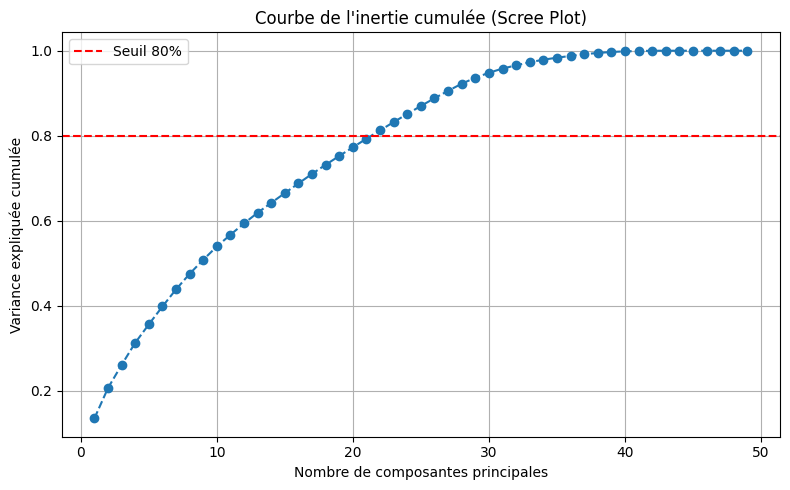

In [109]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardisation des donn√©es
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded_cp)

# PCA (en gardant toutes les composantes)
pca = PCA()
pca.fit(X_scaled)

# Variance expliqu√©e cumul√©e
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Affichage de la courbe
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliqu√©e cumul√©e")
plt.title("Courbe de l'inertie cumul√©e (Scree Plot)")
plt.grid(True)
plt.axhline(y=0.80, color='r', linestyle='--', label='Seuil 80%')
plt.legend()
plt.tight_layout()
plt.show()

Il faut au moins 20 composantes principales pour expliquer environ 80% de variances

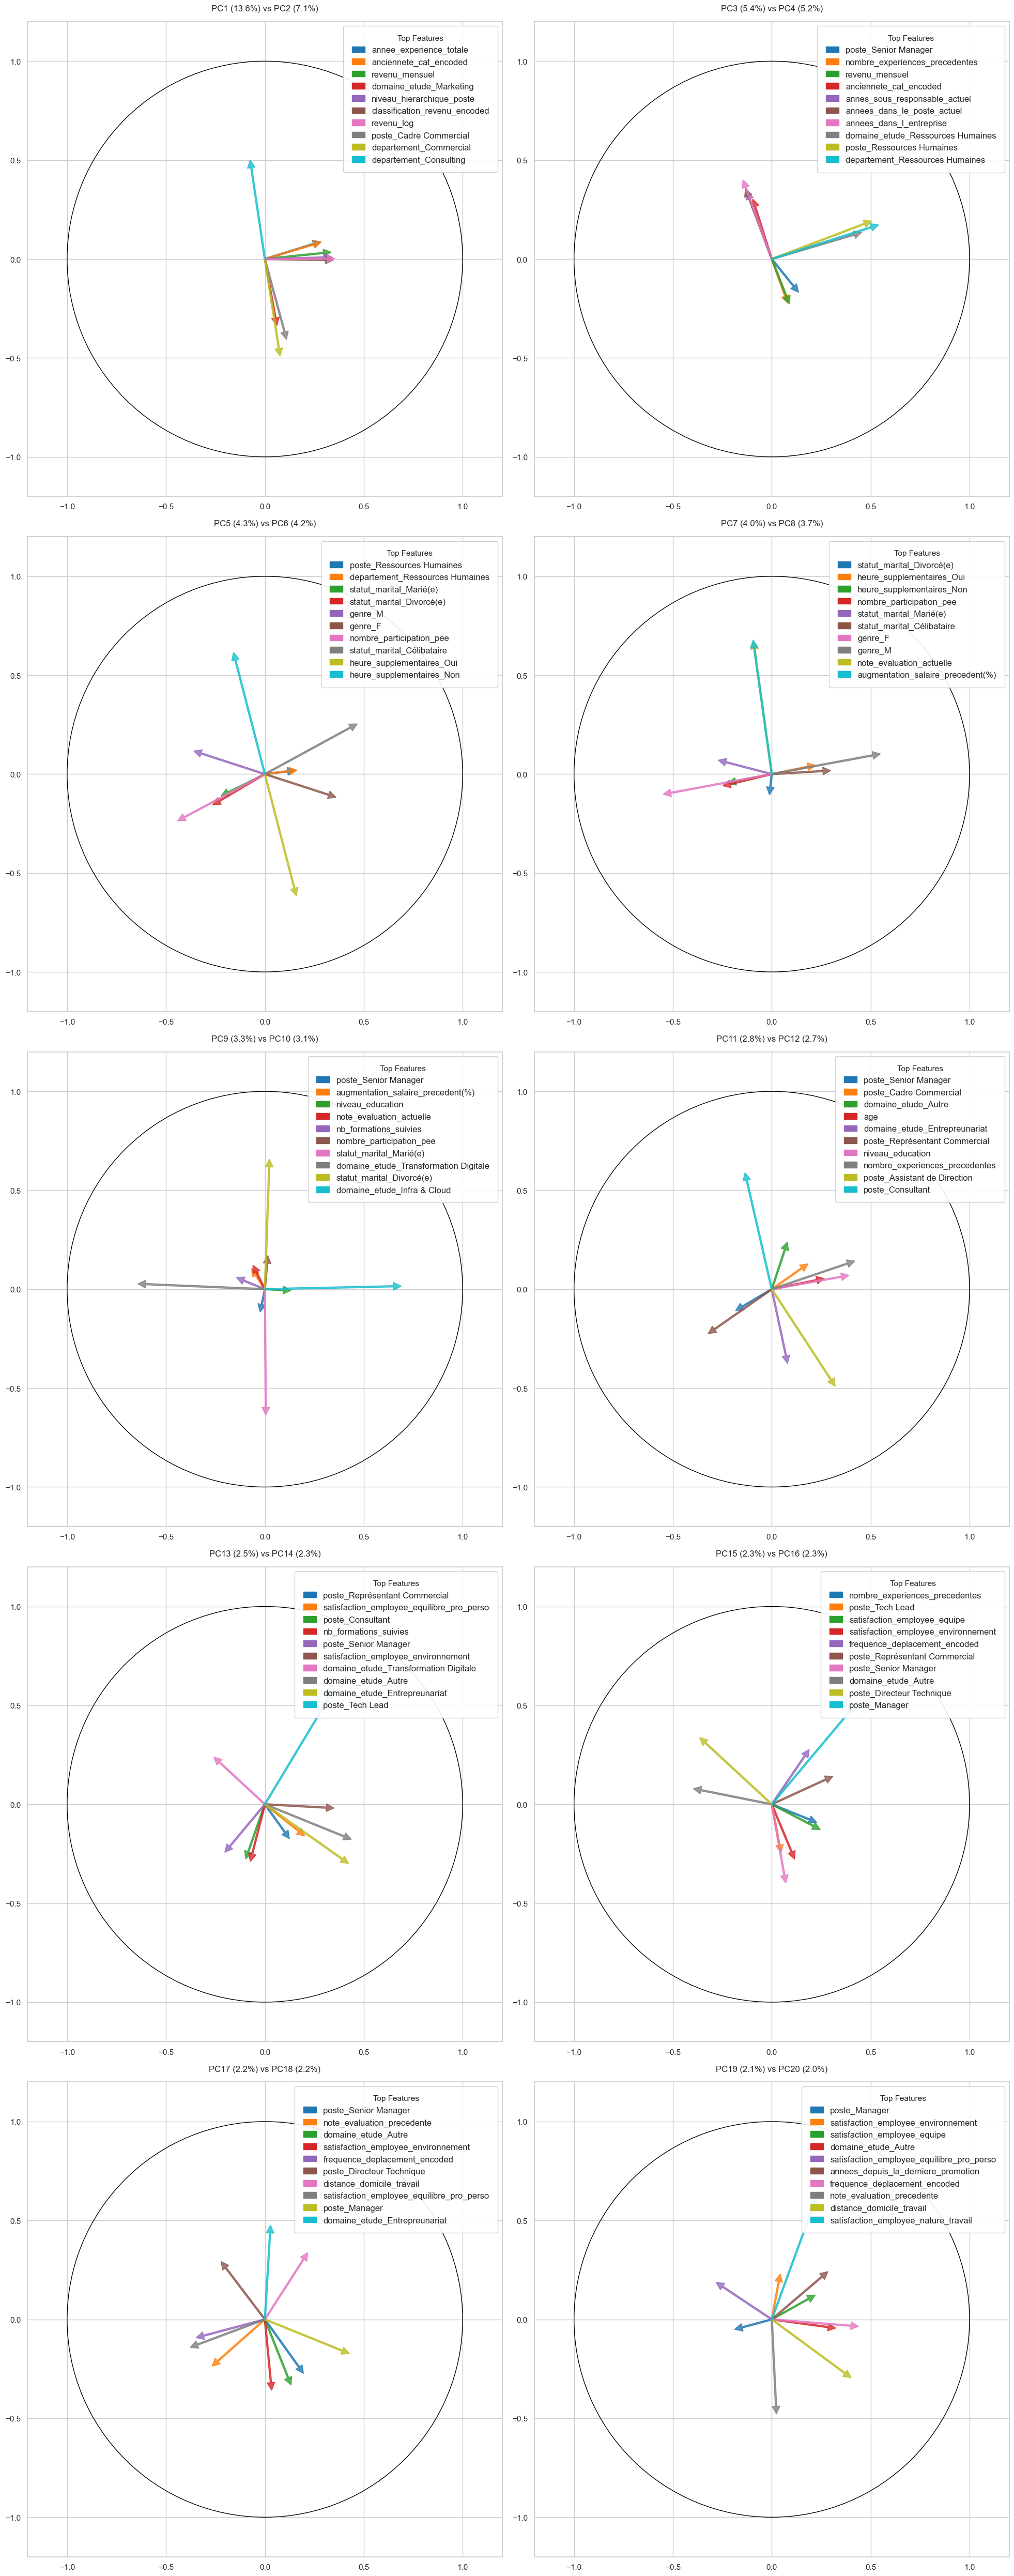


D√âTAIL DES COMPOSANTES PRINCIPALES (20 PREMI√àRES)

Composante   Variance (%)    Cumul (%)      
---------------------------------------------
PC1           13.55           13.55          
PC2           7.14            20.69          
PC3           5.43            26.12          
PC4           5.20            31.32          
PC5           4.33            35.65          
PC6           4.20            39.85          
PC7           4.03            43.88          
PC8           3.66            47.54          
PC9           3.31            50.84          
PC10          3.12            53.96          
PC11          2.77            56.73          
PC12          2.65            59.39          
PC13          2.51            61.90          
PC14          2.33            64.23          
PC15          2.29            66.52          
PC16          2.28            68.80          
PC17          2.24            71.03          
PC18          2.15            73.19          
PC19          2.06         

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
import seaborn as sns

# 1. Standardisation et PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded_cp)
pca = PCA(n_components=20)
pca.fit(X_scaled)

# 2. Configuration de l'affichage
n_pairs = 10
rows = (n_pairs + 1) // 2
plt.figure(figsize=(20, rows * 10))

# Utilisation du style Seaborn moderne
sns.set_theme(style="whitegrid")

# 3. Palette de couleurs optimis√©e
colors = plt.cm.tab10.colors  # 10 couleurs distinctes

# 4. Fonction pour g√©n√©rer chaque cercle des corr√©lations
def plot_pca_pair(ax, pc1, pc2):
    components = pca.components_[[pc1, pc2]]
    norms = np.sqrt(components[0, :]**2 + components[1, :]**2)
    top_indices = np.argsort(norms)[-10:]
    
    # Cercle unit√©
    circle = plt.Circle((0, 0), 1, color='black', fill=False, zorder=1)
    ax.add_artist(circle)
    
    # Fl√®ches color√©es pour les 10 variables les plus contributrices
    for j, idx in enumerate(top_indices):
        x, y = components[0, idx], components[1, idx]
        ax.arrow(0, 0, x, y, 
                 head_width=0.04, 
                 head_length=0.04,
                 fc=colors[j],
                 ec=colors[j],
                 alpha=0.8,
                 width=0.008,
                 length_includes_head=True,
                 zorder=2)
    
    # L√©gende int√©gr√©e
    legend_elements = [Patch(facecolor=colors[j],
                              edgecolor=colors[j],
                              label=f"{data_encoded_cp.columns[idx]}") 
                       for j, idx in enumerate(top_indices)]
    
    ax.legend(handles=legend_elements,
              loc='upper right',
              fontsize=12,
              framealpha=0.9,
              title="Top Features",
              title_fontsize=11,
              borderpad=1.0,
              handlelength=1.5)
    
    # Configuration des axes
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.axhline(0, color='gray', lw=0.8, alpha=0.5, zorder=0)
    ax.axvline(0, color='gray', lw=0.8, alpha=0.5, zorder=0)
    
    # Titre avec la variance expliqu√©e
    var_pc1 = pca.explained_variance_ratio_[pc1] * 100
    var_pc2 = pca.explained_variance_ratio_[pc2] * 100
    ax.set_title(f"PC{pc1+1} ({var_pc1:.1f}%) vs PC{pc2+1} ({var_pc2:.1f}%)",
                 pad=15, fontsize=12)

# 5. G√©n√©ration des graphiques
for i in range(n_pairs):
    ax = plt.subplot(rows, 2, i+1)
    plot_pca_pair(ax, 2*i, 2*i+1)

plt.tight_layout()
plt.show()

# 6. Affichage des pourcentages de variance

print("\nD√âTAIL DES COMPOSANTES PRINCIPALES (20 PREMI√àRES)\n")
print(f"{'Composante':<12} {'Variance (%)':<15} {'Cumul (%)':<15}")
print("-"*45)

cumulative = 0
for i, var in enumerate(pca.explained_variance_ratio_):
    cumulative += var * 100
    print(f"PC{i+1:<11} {var*100:<15.2f} {cumulative:<15.2f}")

print("\n" + "="*60)
print(f"Variance totale expliqu√©e par les 20 premi√®res PC : {cumulative:.2f}%")
print("="*60)


## III- Extraction des fichiers 

In [ ]:
data_cible_encoded.to_csv('data_cible_encoded.csv', index=False)
data_encoded.to_csv('data_encoded.csv', index=False)
data_encoded_cp.to_csv('data_encoded_cp.csv', index=False)
data.to_csv('data.csv', index=False)
data_cible.to_csv('data_cible.csv', index=False)

# Voir l'√©tape 3 (mod√©lisation) dans le second notebook via le lien ci-dessous

[Aller au second notebook](./Fonkou_Symphor_2_notebook_160625.ipynb)